In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

### UPLOAD DATA

In [47]:
path = r"C:\Users\ASUS VIVOBOOK\Documents\ITS\Kerja Praktik\DATA\data_klinkerdanlin.xlsx"
df = pd.read_excel(path)
df


Date  Kiln (h)  SLC (h)  EO Kiln (h)  EO Cooler (h)  ILC (t)  \
0    01-01-2023      24.0     24.0          0.0            0.0     4831   
1    02-01-2023      24.0     24.0          0.0            0.0     4742   
2    03-01-2023      24.0     24.0          0.0            0.0     4689   
3    04-01-2023      24.0     24.0          0.0            0.0     4732   
4    05-01-2023      24.0     24.0          0.0            0.0     4820   
..          ...       ...      ...          ...            ...      ...   
907  26-06-2025      24.0     24.0         15.3           24.0     4635   
908  27-06-2025      24.0     24.0         20.1           24.0     4433   
909  28-06-2025      24.0     24.0         22.9           24.0     4333   
910  29-06-2025      24.0     24.0         24.0           24.0     4454   
911  30-06-2025      24.0     24.0         21.2           21.9     4333   

     SLC (t)  Dust (t)  Total Feed (t/h)  Total Feed (t)  ...       SO3  \
0       7262       150               504           12093  ...  0.724917   
1       7399         0               506           12141  ...  0.704917   
2       7556        52               510           12245  ...  0.654769   
3       7633       392               515           12364  ...  0.704167   
4       7520        47               514           12339  ...  0.676750   
..       ...       ...               ...             ...  ...       ...   
907     7249         0               495           11884  ...  0.433786   
908     7301        77               489           11733  ...  0.423421   
909     7428        22               490           11761  ...  0.428692   
910     7603         0               502           12057  ...  0.429769   
911     7478         0               492           11811  ...  0.506071   

           Cl        LSF       SIM       ALM        C3S        C2S       C3A  \
0    0.022583  96.873638  2.427525  1.503798  62.706480  13.817067  8.040471   
1    0.021500  96.007401  2.428526  1.494197  61.178578  15.343153  8.027894   
2    0.021308  95.851813  2.351829  1.473867  61.051179  15.413286  8.155669   
3    0.024000  97.319494  2.345473  1.459452  63.709252  12.707643  7.992272   
4    0.024083  97.460189  2.391472  1.458787  63.644352  12.580783  7.806958   
..        ...        ...       ...       ...        ...        ...       ...   
907  0.019143  96.598514  2.397140  1.764384  59.214640  16.162214  9.552038   
908  0.019158  96.285769  2.397590  1.781846  58.976347  16.653030  9.691931   
909  0.018538  96.955696  2.370988  1.760551  59.762001  15.741111  9.635684   
910  0.018846  97.165513  2.387552  1.734592  60.584093  15.215843  9.450498   
911  0.019071  97.064443  2.426213  1.706892  61.156214  14.921853  9.176067   

          C4AF     FCaOX  
0    10.671040  0.912433  
1    10.773488  0.810300  
2    11.212051  0.691662  
3    11.178714  0.872983  
4    10.937303  0.965583  
..         ...       ...  
907   9.739991  1.213086  
908   9.731194  1.130747  
909   9.861661  1.305869  
910   9.902156  1.315346  
911   9.869101  1.203514  

[912 rows x 57 columns]

In [48]:
# Filter data untuk hanya menyertakan baris dengan nilai 'Kiln (h)' lebih besar dari 0
df = df[df['Kiln (h)'] > 0]

In [49]:
df = df.dropna(subset=['FCaOX'])

### EXPLORATORY DATA ANALYSIS

In [50]:
# Cek informasi DataFrame
print("Informasi DataFrame:")
df.info()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 911
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               720 non-null    object 
 1   Kiln (h)           720 non-null    float64
 2   SLC (h)            720 non-null    float64
 3   EO Kiln (h)        720 non-null    float64
 4   EO Cooler (h)      720 non-null    float64
 5   ILC (t)            720 non-null    int64  
 6   SLC (t)            720 non-null    int64  
 7   Dust (t)           720 non-null    int64  
 8   Total Feed (t/h)   720 non-null    int64  
 9   Total Feed (t)     720 non-null    int64  
 10  Prod.(t)           720 non-null    int64  
 11  Kiln (l)           720 non-null    int64  
 12  ILC (l)            720 non-null    int64  
 13  SLC Biomas (t)     720 non-null    float64
 14  Biomas (t/h)       720 non-null    float64
 15  RDF (t/h)          720 non-null    float64
 16  Putzmeitze

In [51]:
# Cek nama kolom
print("\nNama kolom DataFrame:")
df.keys()


Nama kolom DataFrame:


Index(['Date', 'Kiln (h)', 'SLC (h)', 'EO Kiln (h)', 'EO Cooler (h)',
       'ILC (t)', 'SLC (t)', 'Dust (t)', 'Total Feed (t/h)', 'Total Feed (t)',
       'Prod.(t)', 'Kiln (l)', 'ILC (l)', 'SLC Biomas (t) ', 'Biomas (t/h)',
       'RDF (t/h)', 'Putzmeitzer (t/h)', 'AR KBE (t/h)', 'Kiln (t)',
       'ILC FC (t)', 'SLC FC (t)', 'VW (g/L)', 'Thermal (MJ/t)',
       'Electric (kWh/t)', 'TSR (%)', 'Air Rat (Nm3/kg)', 'Temp. Out (°C)',
       'Silo Stock (t)', 'Main Silo (h)', 'Unburn Silo (h)', 'Transfer (h)',
       'Kiln (mg/Nm3)', 'Cooler (mg/Nm3)', 'Inlet (°C)', 'BZT (°C)',
       'H Pres (mmH2O)', 'Amp (A)', 'Rat (RD Indeks)', 'ILC (°C)', 'SLC (°C)',
       'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'K2O', 'Na2O', 'SO3', 'Cl',
       'LSF', 'SIM', 'ALM', 'C3S', 'C2S', 'C3A', 'C4AF', 'FCaOX'],
      dtype='object')

In [52]:
# Cek Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
         Kiln (h)     SLC (h)  EO Kiln (h)  EO Cooler (h)      ILC (t)  \
count  720.000000  720.000000   720.000000     720.000000   720.000000   
mean    22.657361   22.328611    12.350556      16.550556  4646.179167   
std      3.990200    4.585605    10.284946       9.871101   952.295391   
min      1.400000    0.000000     0.000000       0.000000   186.000000   
25%     24.000000   24.000000     0.000000       7.075000  4498.750000   
50%     24.000000   24.000000    14.500000      23.000000  4881.500000   
75%     24.000000   24.000000    23.325000      24.000000  5195.000000   
max     24.000000   24.000000    24.000000      24.000000  5794.000000   

           SLC (t)     Dust (t)  Total Feed (t/h)  Total Feed (t)  \
count   720.000000   720.000000        720.000000      720.000000   
mean   6489.094444   198.116667        486.452778    11125.213889   
std    1459.342692   212.665409         42.415823     2309.758580   
min       0.000000     0.000000   

In [53]:
# Cek bentuk DataFrame
print("\nBentuk DataFrame:")
df.shape


Bentuk DataFrame:


(720, 57)

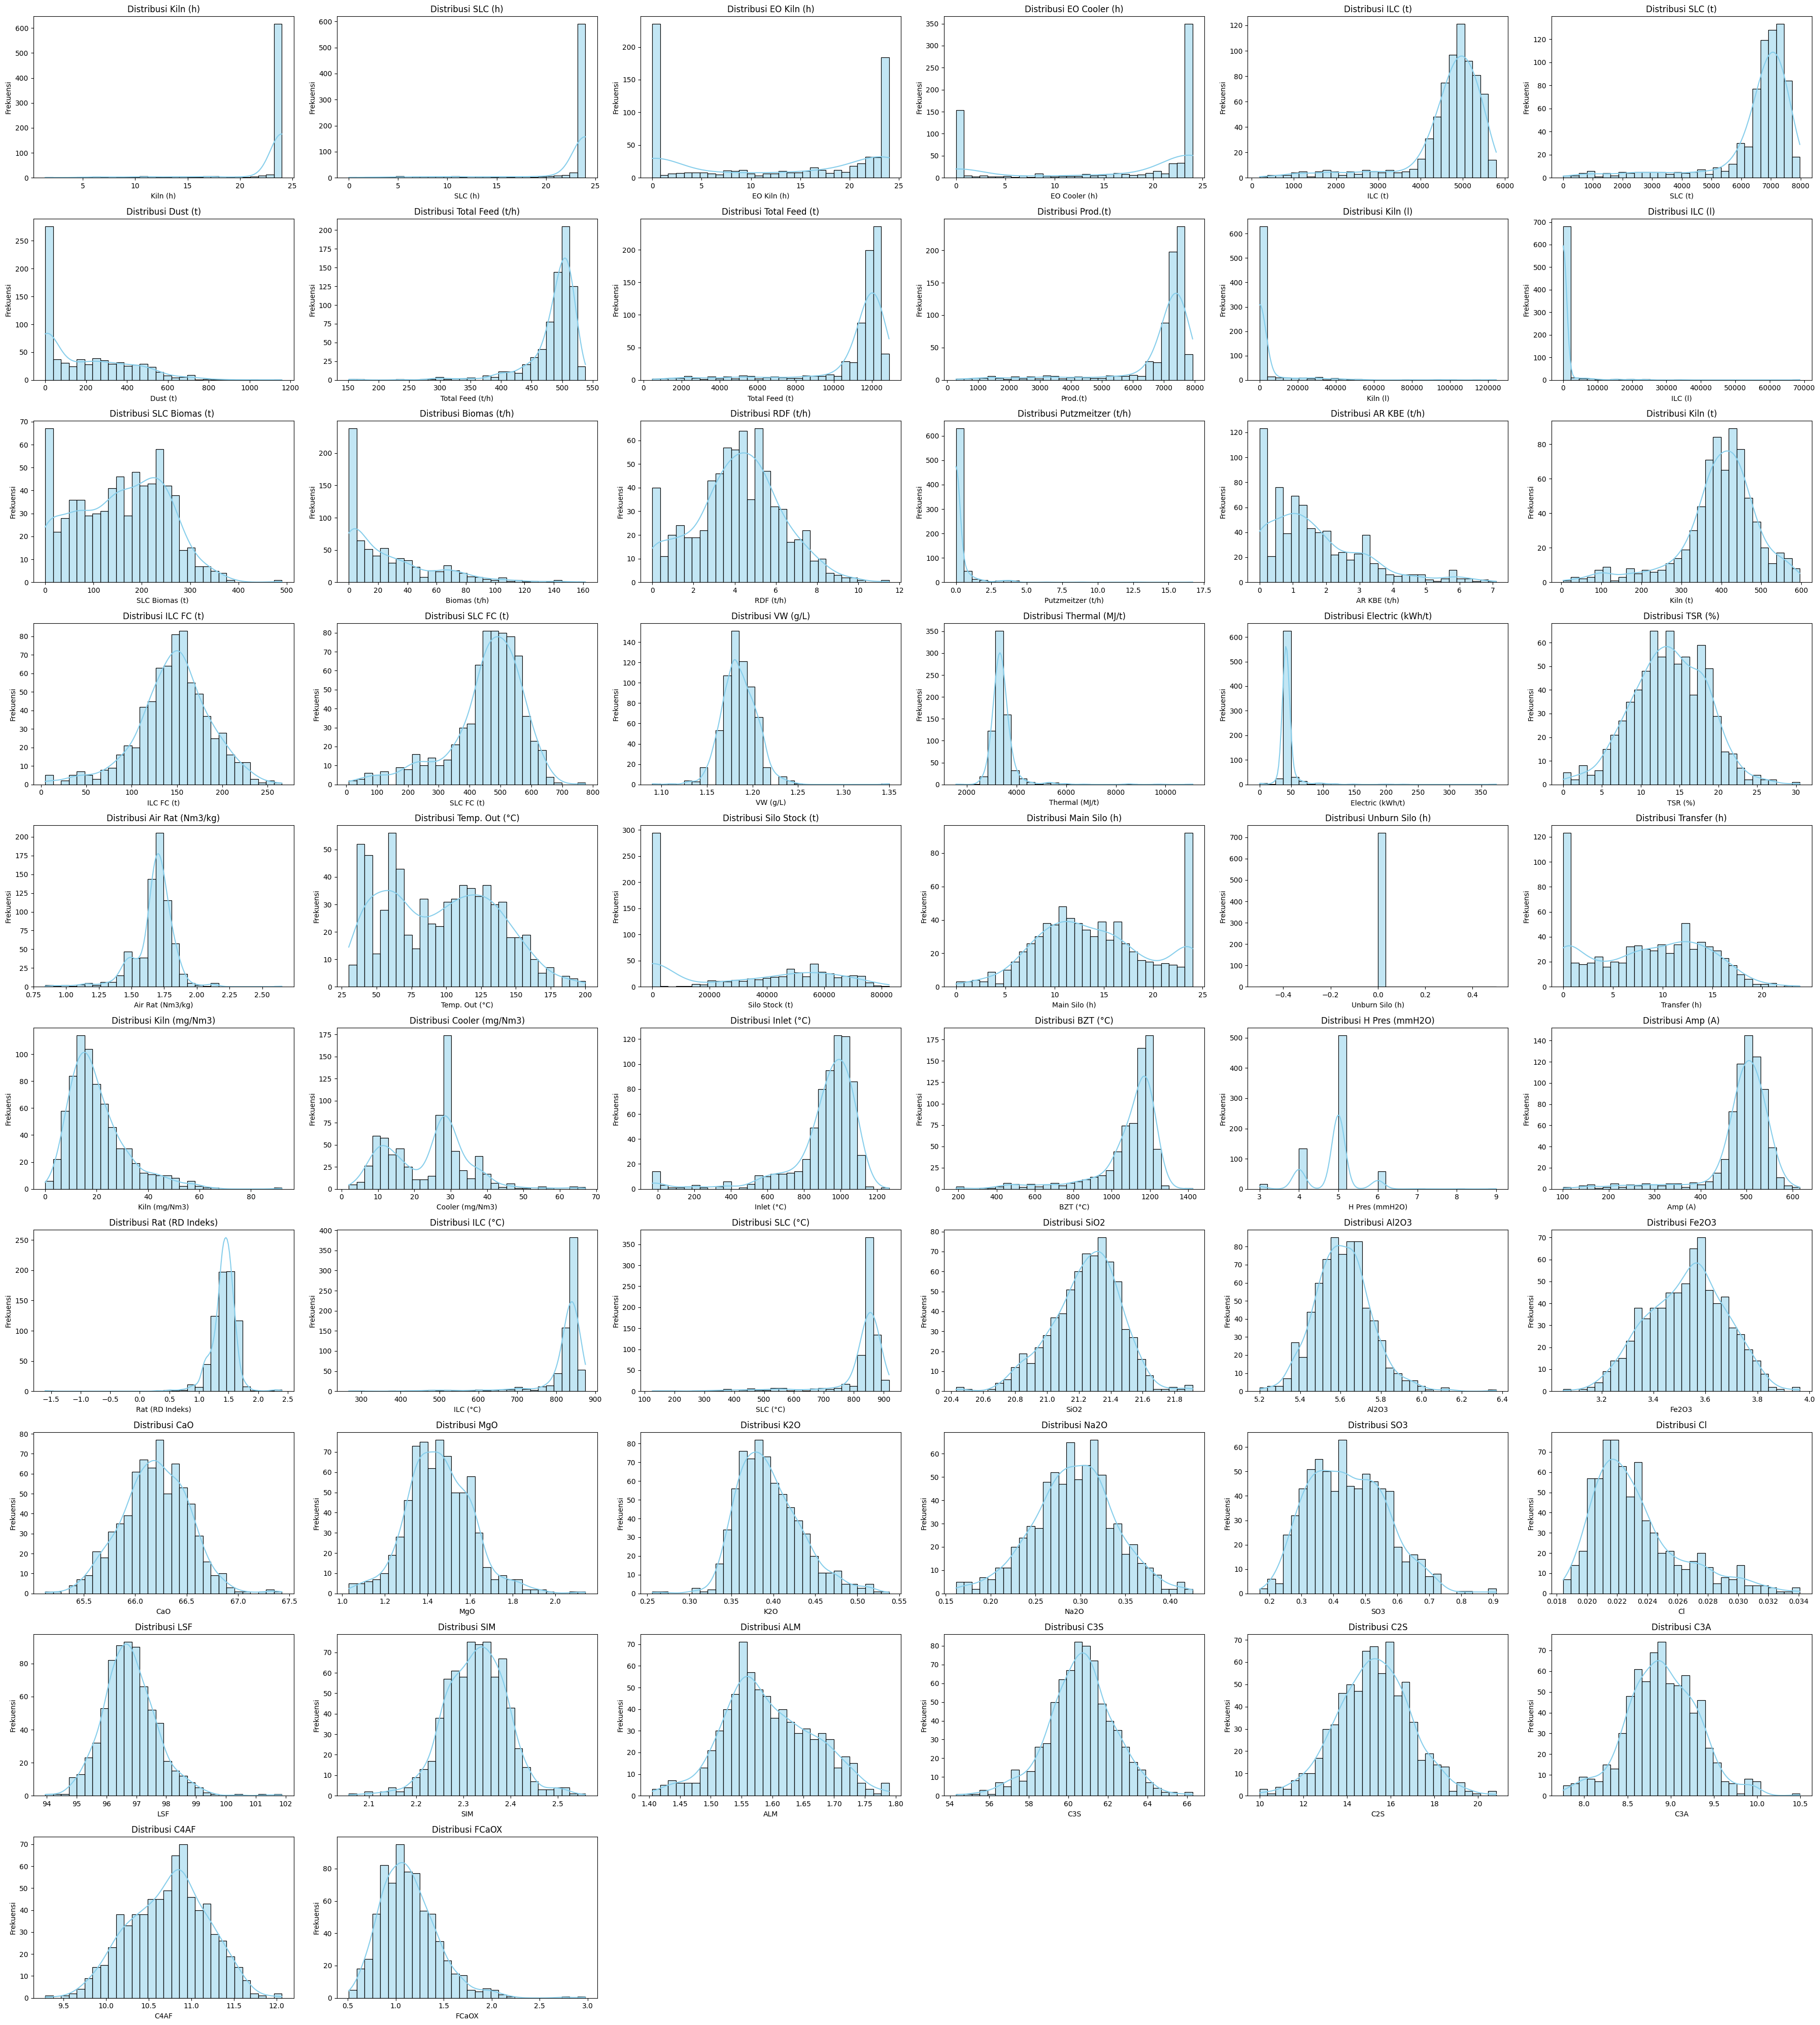

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# === 1. Ambil semua kolom numerik ===
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# === 2. Hitung jumlah subplot ===
n = len(numeric_cols)
cols = 6   # banyak kolom subplot
rows = math.ceil(n / cols)

# === 3. Buat canvas ===
plt.figure(figsize=(6*cols, 4*rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


In [55]:
df.shape

(720, 57)

In [56]:
# === 1. Cek jumlah missing value per kolom ===
missing_values = df.isnull().sum()

# === 2. Tampilkan hanya kolom yang punya missing value ===
missing_values = missing_values[missing_values > 0]

print("Kolom dengan missing value:")
print(missing_values)

# === 3. (Opsional) tampilkan juga persentase missing value ===
missing_percent = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percent)


Kolom dengan missing value:
VW (g/L)           69
Temp. Out (°C)     10
Kiln (mg/Nm3)       2
Cooler (mg/Nm3)     2
Inlet (°C)          1
BZT (°C)            1
dtype: int64

Persentase missing value per kolom:
VW (g/L)           9.583333
Temp. Out (°C)     1.388889
Kiln (mg/Nm3)      0.277778
Cooler (mg/Nm3)    0.277778
Inlet (°C)         0.138889
BZT (°C)           0.138889
dtype: float64


C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_4712\2085924647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.values, y=missing_counts.index, palette="Reds_r")


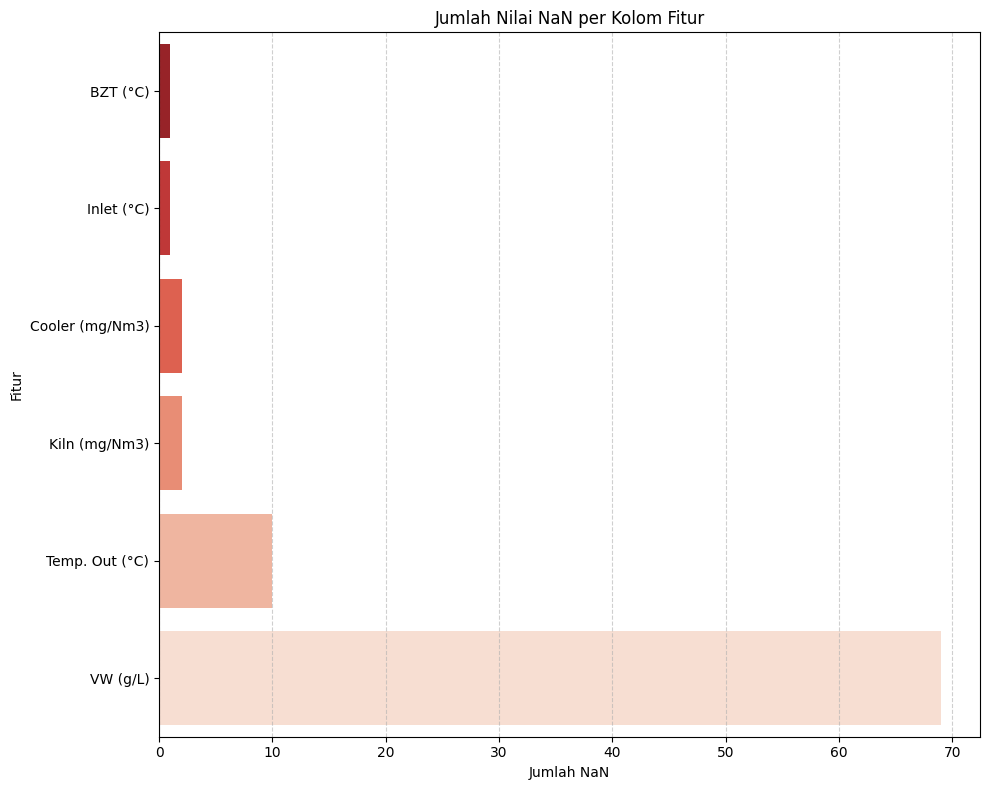

In [57]:
# Visualisasi Missing Value

# Hitung jumlah NaN per kolom fitur
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_counts.values, y=missing_counts.index, palette="Reds_r")
plt.title("Jumlah Nilai NaN per Kolom Fitur")
plt.xlabel("Jumlah NaN")
plt.ylabel("Fitur")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [58]:
# Handle Missing Value
from sklearn.impute import SimpleImputer
emisi_cols = ['Kiln (mg/Nm3)', 'Cooler (mg/Nm3)']
df[emisi_cols] = df[emisi_cols].fillna(0)

# 3. Buat imputasi mean untuk kolom suhu lainnya
suhu_cols = ['Temp. Out (°C)', 'Inlet (°C)', 'BZT (°C)']

# Hanya imputasi kolom suhu
imputer = SimpleImputer(strategy='mean')
df[suhu_cols] = imputer.fit_transform(df[suhu_cols])

In [59]:
# Isi kolom VW dengan nilai rata-rata
df['VW (g/L)'] = df['VW (g/L)'].fillna(df['VW (g/L)'].mean())

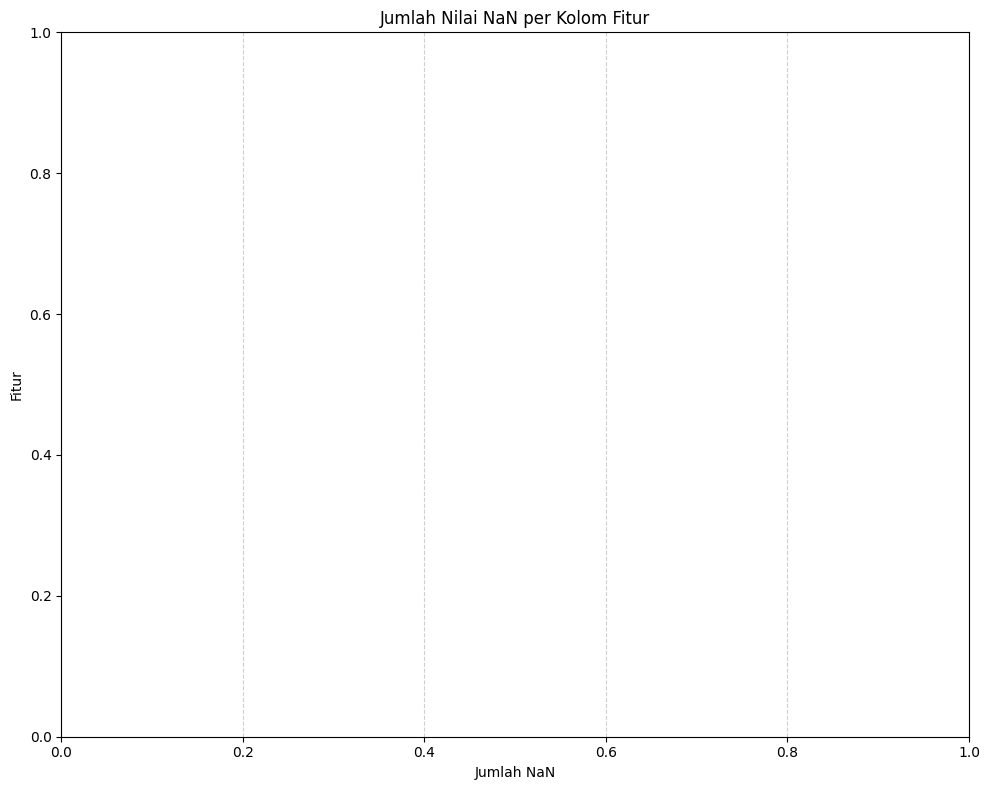

In [60]:
# Visualisasi Missing Value

# Hitung jumlah NaN per kolom fitur
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_counts.values, y=missing_counts.index, palette="Reds_r")
plt.title("Jumlah Nilai NaN per Kolom Fitur")
plt.xlabel("Jumlah NaN")
plt.ylabel("Fitur")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


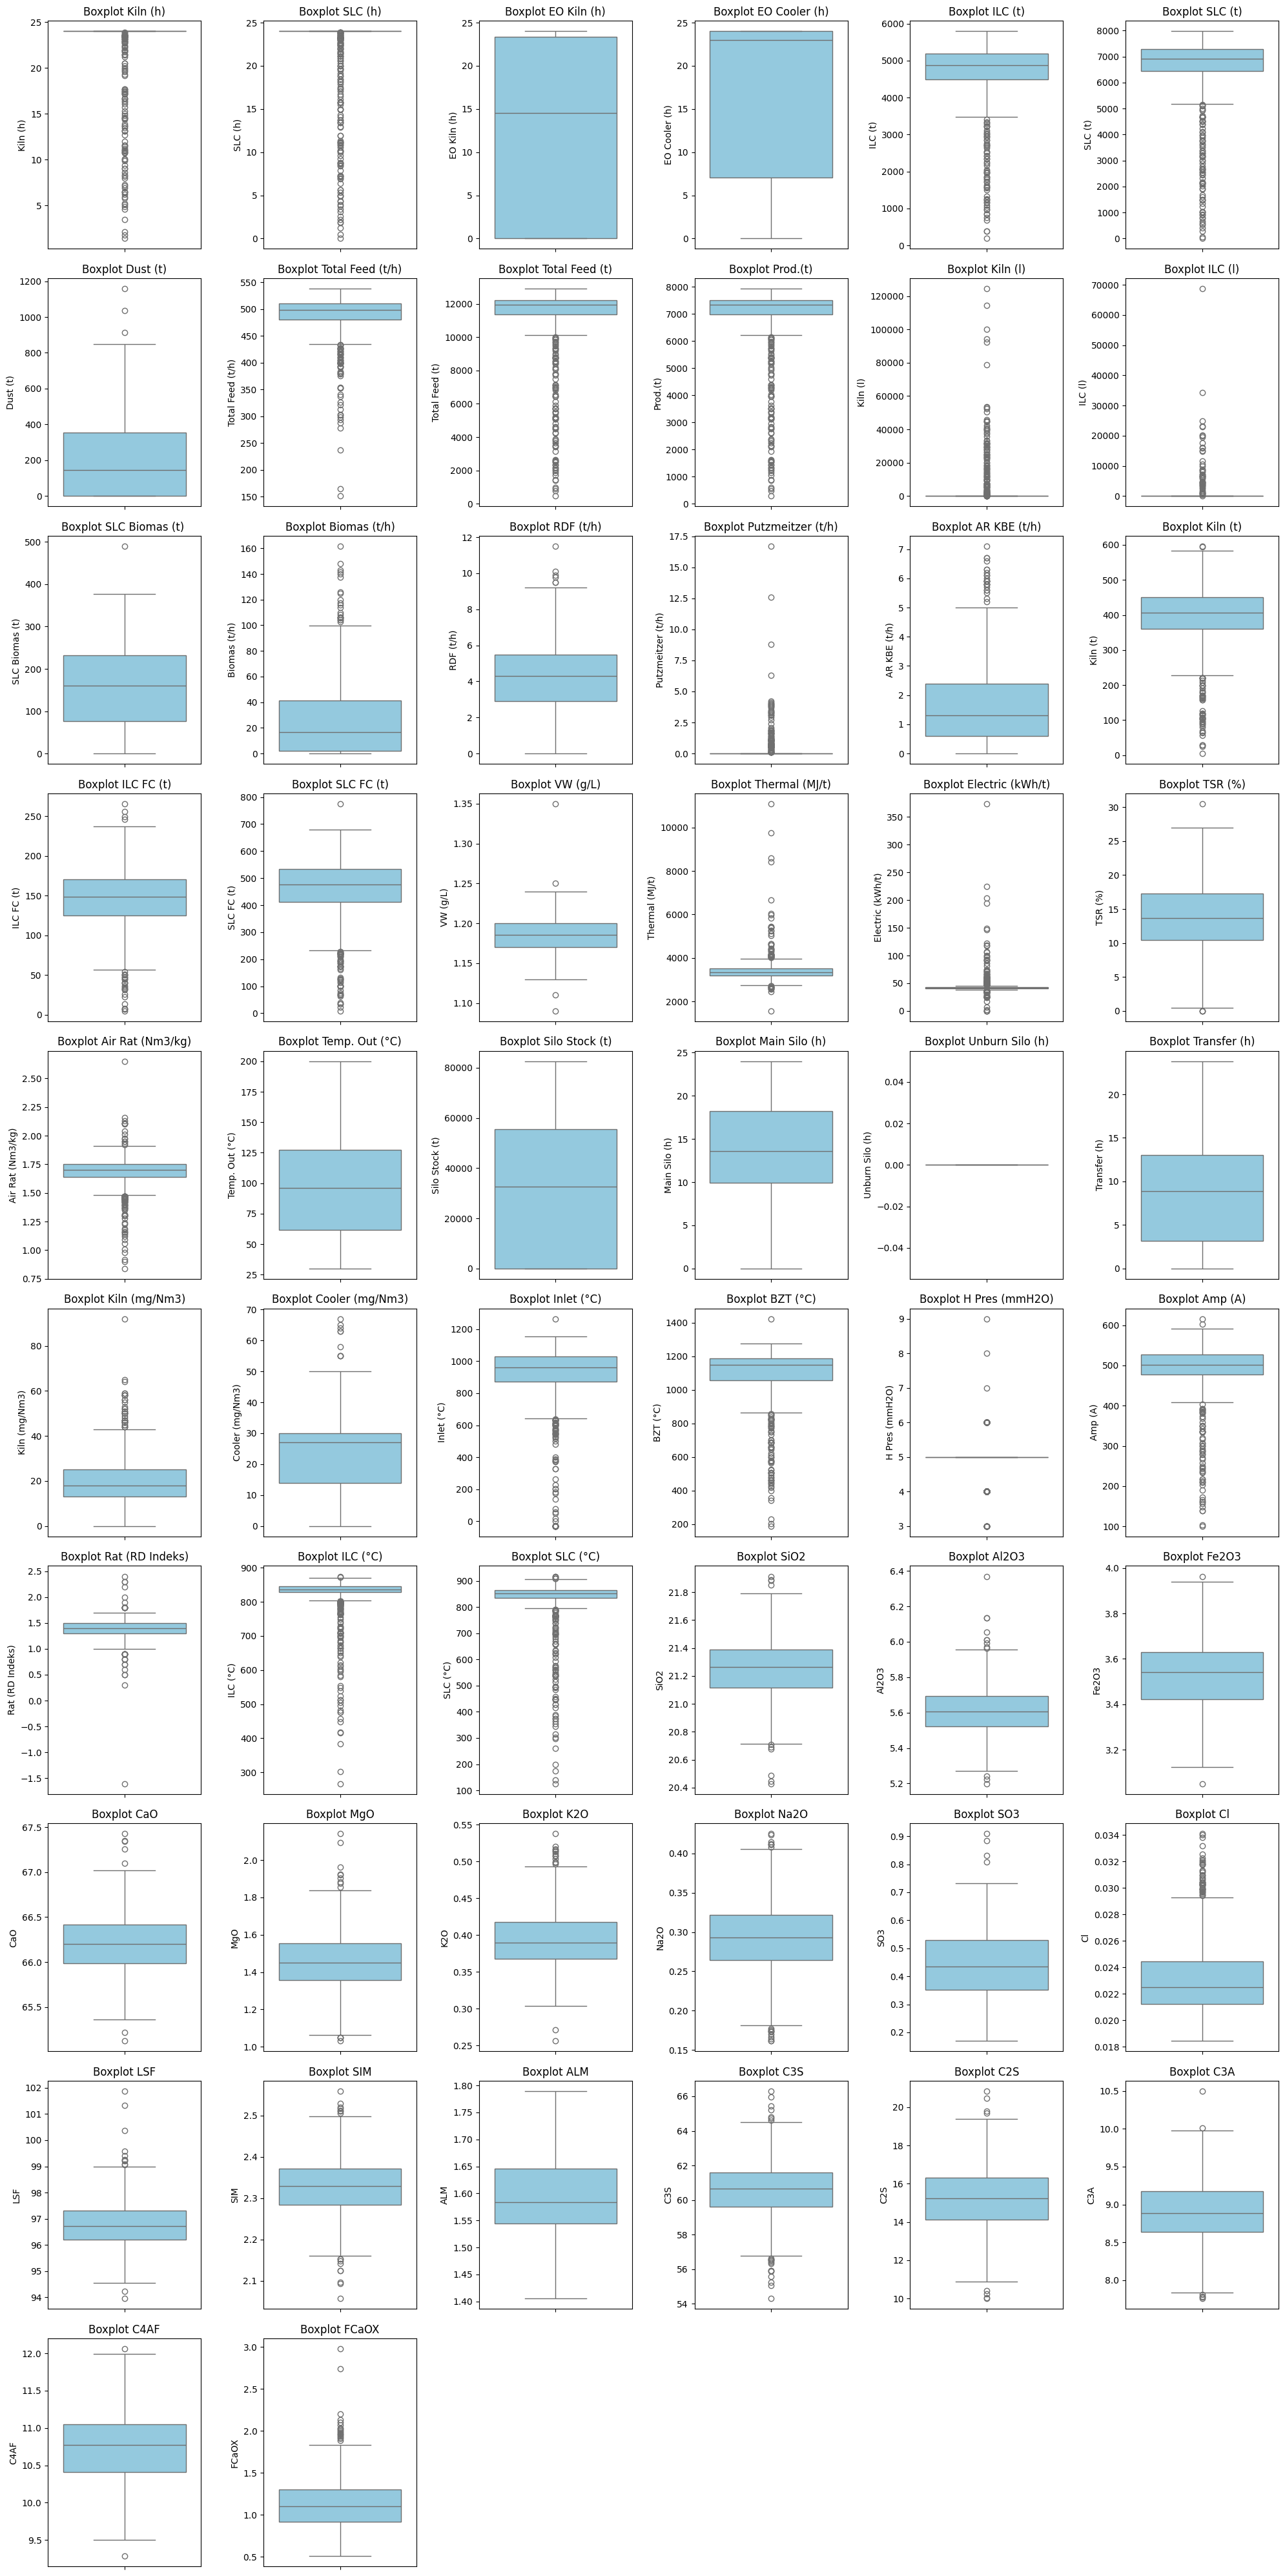

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ambil semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tentukan grid: 5 kolom per baris
n_cols = 6
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))  
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot {col}")

# Hapus subplot kosong kalau jumlah kolom < n_rows*n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [62]:
# Cek Missing Value
print("\nCek Missing Value:")
print(df.isnull().sum())


Cek Missing Value:
Date                 0
Kiln (h)             0
SLC (h)              0
EO Kiln (h)          0
EO Cooler (h)        0
ILC (t)              0
SLC (t)              0
Dust (t)             0
Total Feed (t/h)     0
Total Feed (t)       0
Prod.(t)             0
Kiln (l)             0
ILC (l)              0
SLC Biomas (t)       0
Biomas (t/h)         0
RDF (t/h)            0
Putzmeitzer (t/h)    0
AR KBE (t/h)         0
Kiln (t)             0
ILC FC (t)           0
SLC FC (t)           0
VW (g/L)             0
Thermal (MJ/t)       0
Electric (kWh/t)     0
TSR (%)              0
Air Rat (Nm3/kg)     0
Temp. Out (°C)       0
Silo Stock (t)       0
Main Silo (h)        0
Unburn Silo (h)      0
Transfer (h)         0
Kiln (mg/Nm3)        0
Cooler (mg/Nm3)      0
Inlet (°C)           0
BZT (°C)             0
H Pres (mmH2O)       0
Amp (A)              0
Rat (RD Indeks)      0
ILC (°C)             0
SLC (°C)             0
SiO2                 0
Al2O3                0
Fe2O3         

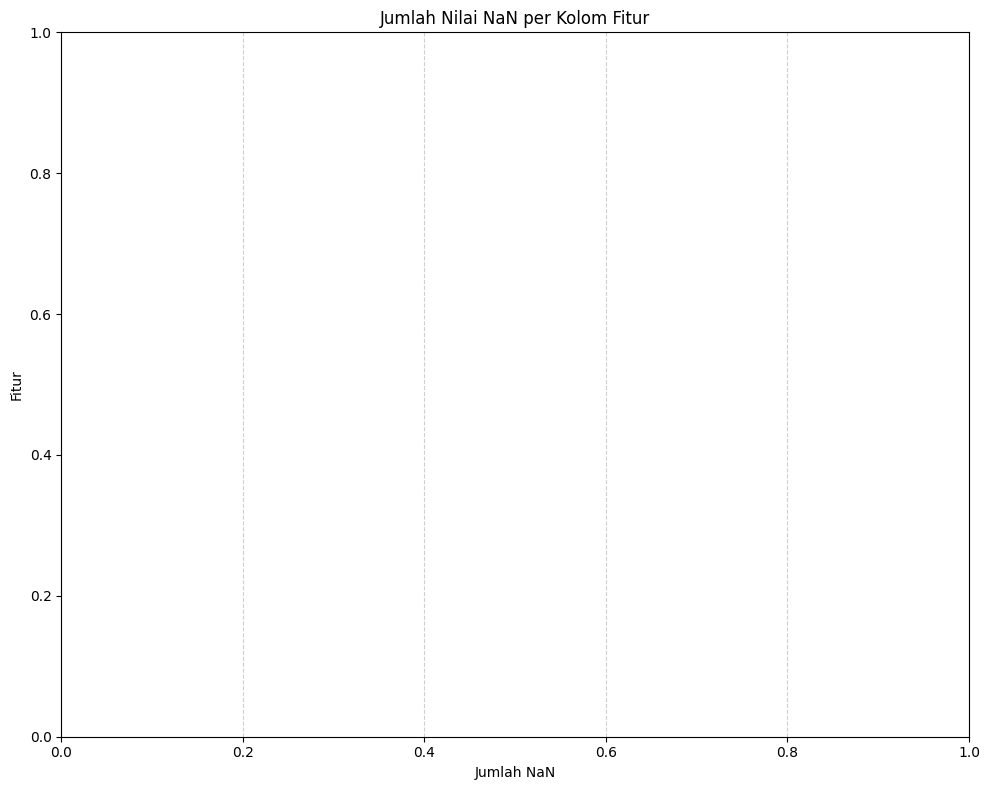

In [63]:
# Visualisasi Missing Value

# Hitung jumlah NaN per kolom fitur
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_counts.values, y=missing_counts.index, palette="Reds_r")
plt.title("Jumlah Nilai NaN per Kolom Fitur")
plt.xlabel("Jumlah NaN")
plt.ylabel("Fitur")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [64]:
df.isna().any().sum()

np.int64(0)

🔍 Korelasi FCaOX terhadap semua fitur numerik:
LSF                  0.527506
CaO                  0.359554
Al2O3               -0.352966
C4AF                -0.351057
Fe2O3               -0.351057
SIM                  0.320839
VW (g/L)            -0.225468
SiO2                -0.203545
Transfer (h)        -0.189196
Main Silo (h)        0.164075
Cooler (mg/Nm3)     -0.154294
Dust (t)            -0.152856
ALM                  0.132369
Biomas (t/h)        -0.131886
AR KBE (t/h)        -0.130784
Rat (RD Indeks)      0.124073
Electric (kWh/t)    -0.112721
SO3                  0.111042
C3A                 -0.101366
SLC (t)             -0.098107
Total Feed (t/h)    -0.093374
Thermal (MJ/t)       0.085639
Air Rat (Nm3/kg)     0.084570
Kiln (mg/Nm3)       -0.077884
EO Cooler (h)        0.076990
Silo Stock (t)      -0.075144
H Pres (mmH2O)      -0.072848
SLC Biomas (t)       0.070263
Na2O                -0.068703
C2S                 -0.068090
Prod.(t)            -0.067002
Total Feed (t)      -0.

c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


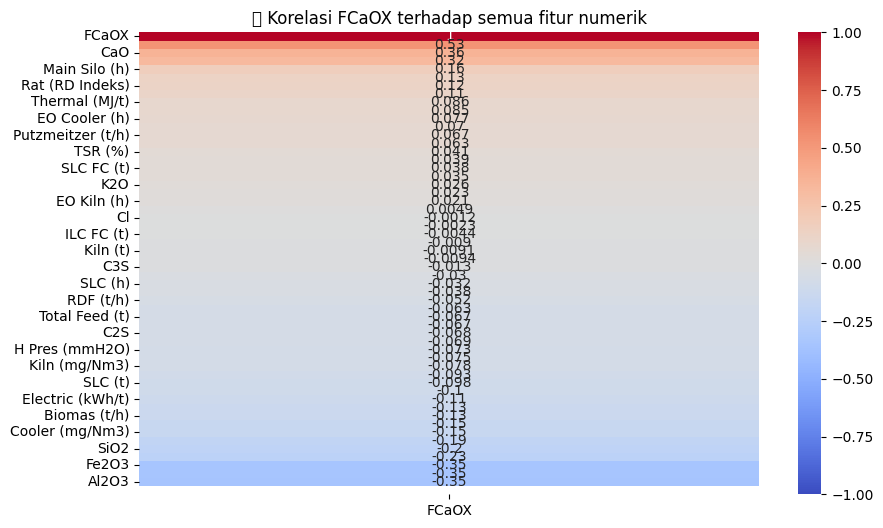

c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


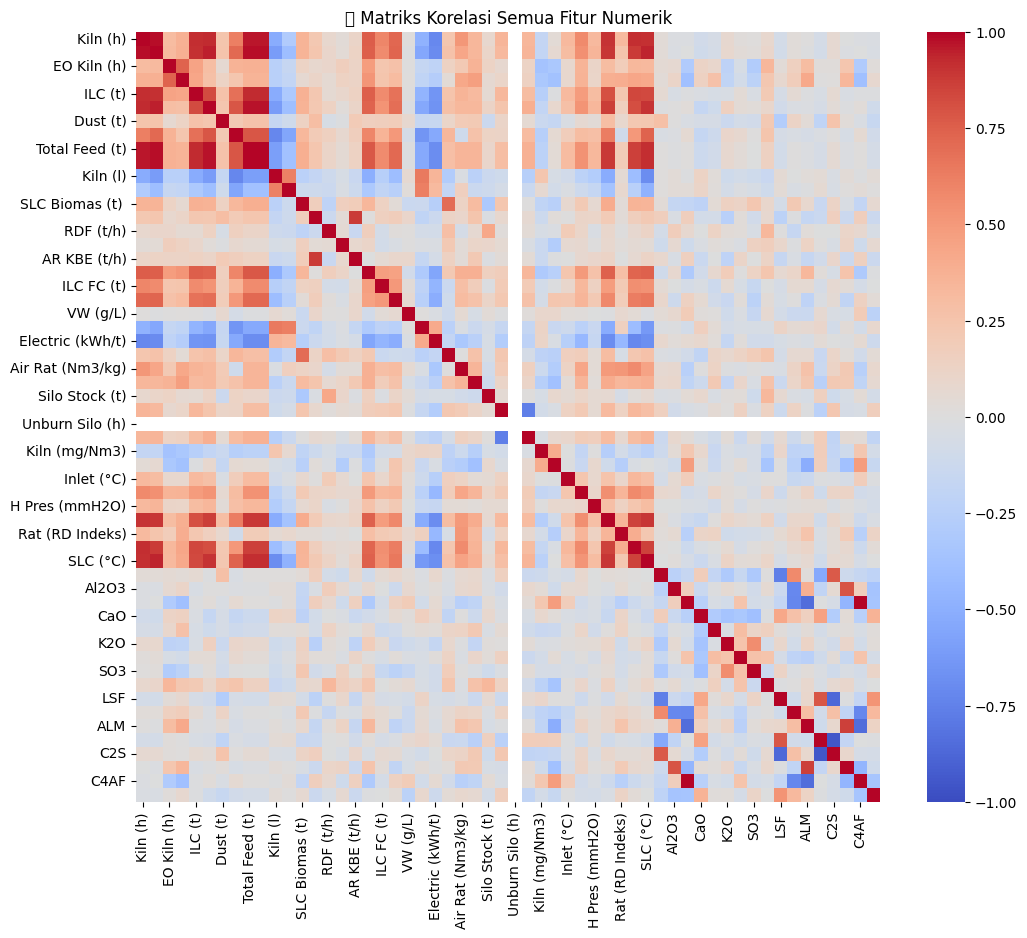

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Ambil semua kolom numerik ---
fitur_numerik = df.select_dtypes(include=[np.number]).columns.tolist()

# --- 2. Drop NaN supaya tidak error ---
df_korelasi = df[fitur_numerik].dropna()

# --- 3. Hitung korelasi Pearson untuk semua variabel numerik ---
corr_matrix = df_korelasi.corr(method='pearson')

# --- 4. Jika mau fokus hanya ke FCaOX ---
if 'FCaOX' in corr_matrix.columns:
    korelasi_fcaox = corr_matrix['FCaOX'].drop('FCaOX').sort_values(key=abs, ascending=False)
    print("🔍 Korelasi FCaOX terhadap semua fitur numerik:")
    print(korelasi_fcaox)

    # --- 5a. Heatmap hanya FCaOX ---
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix[['FCaOX']].sort_values(by='FCaOX', ascending=False), 
                annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('🔗 Korelasi FCaOX terhadap semua fitur numerik')
    plt.show()

# --- 5b. Heatmap full matrix semua variabel numerik ---
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('🔗 Matriks Korelasi Semua Fitur Numerik')
plt.show()


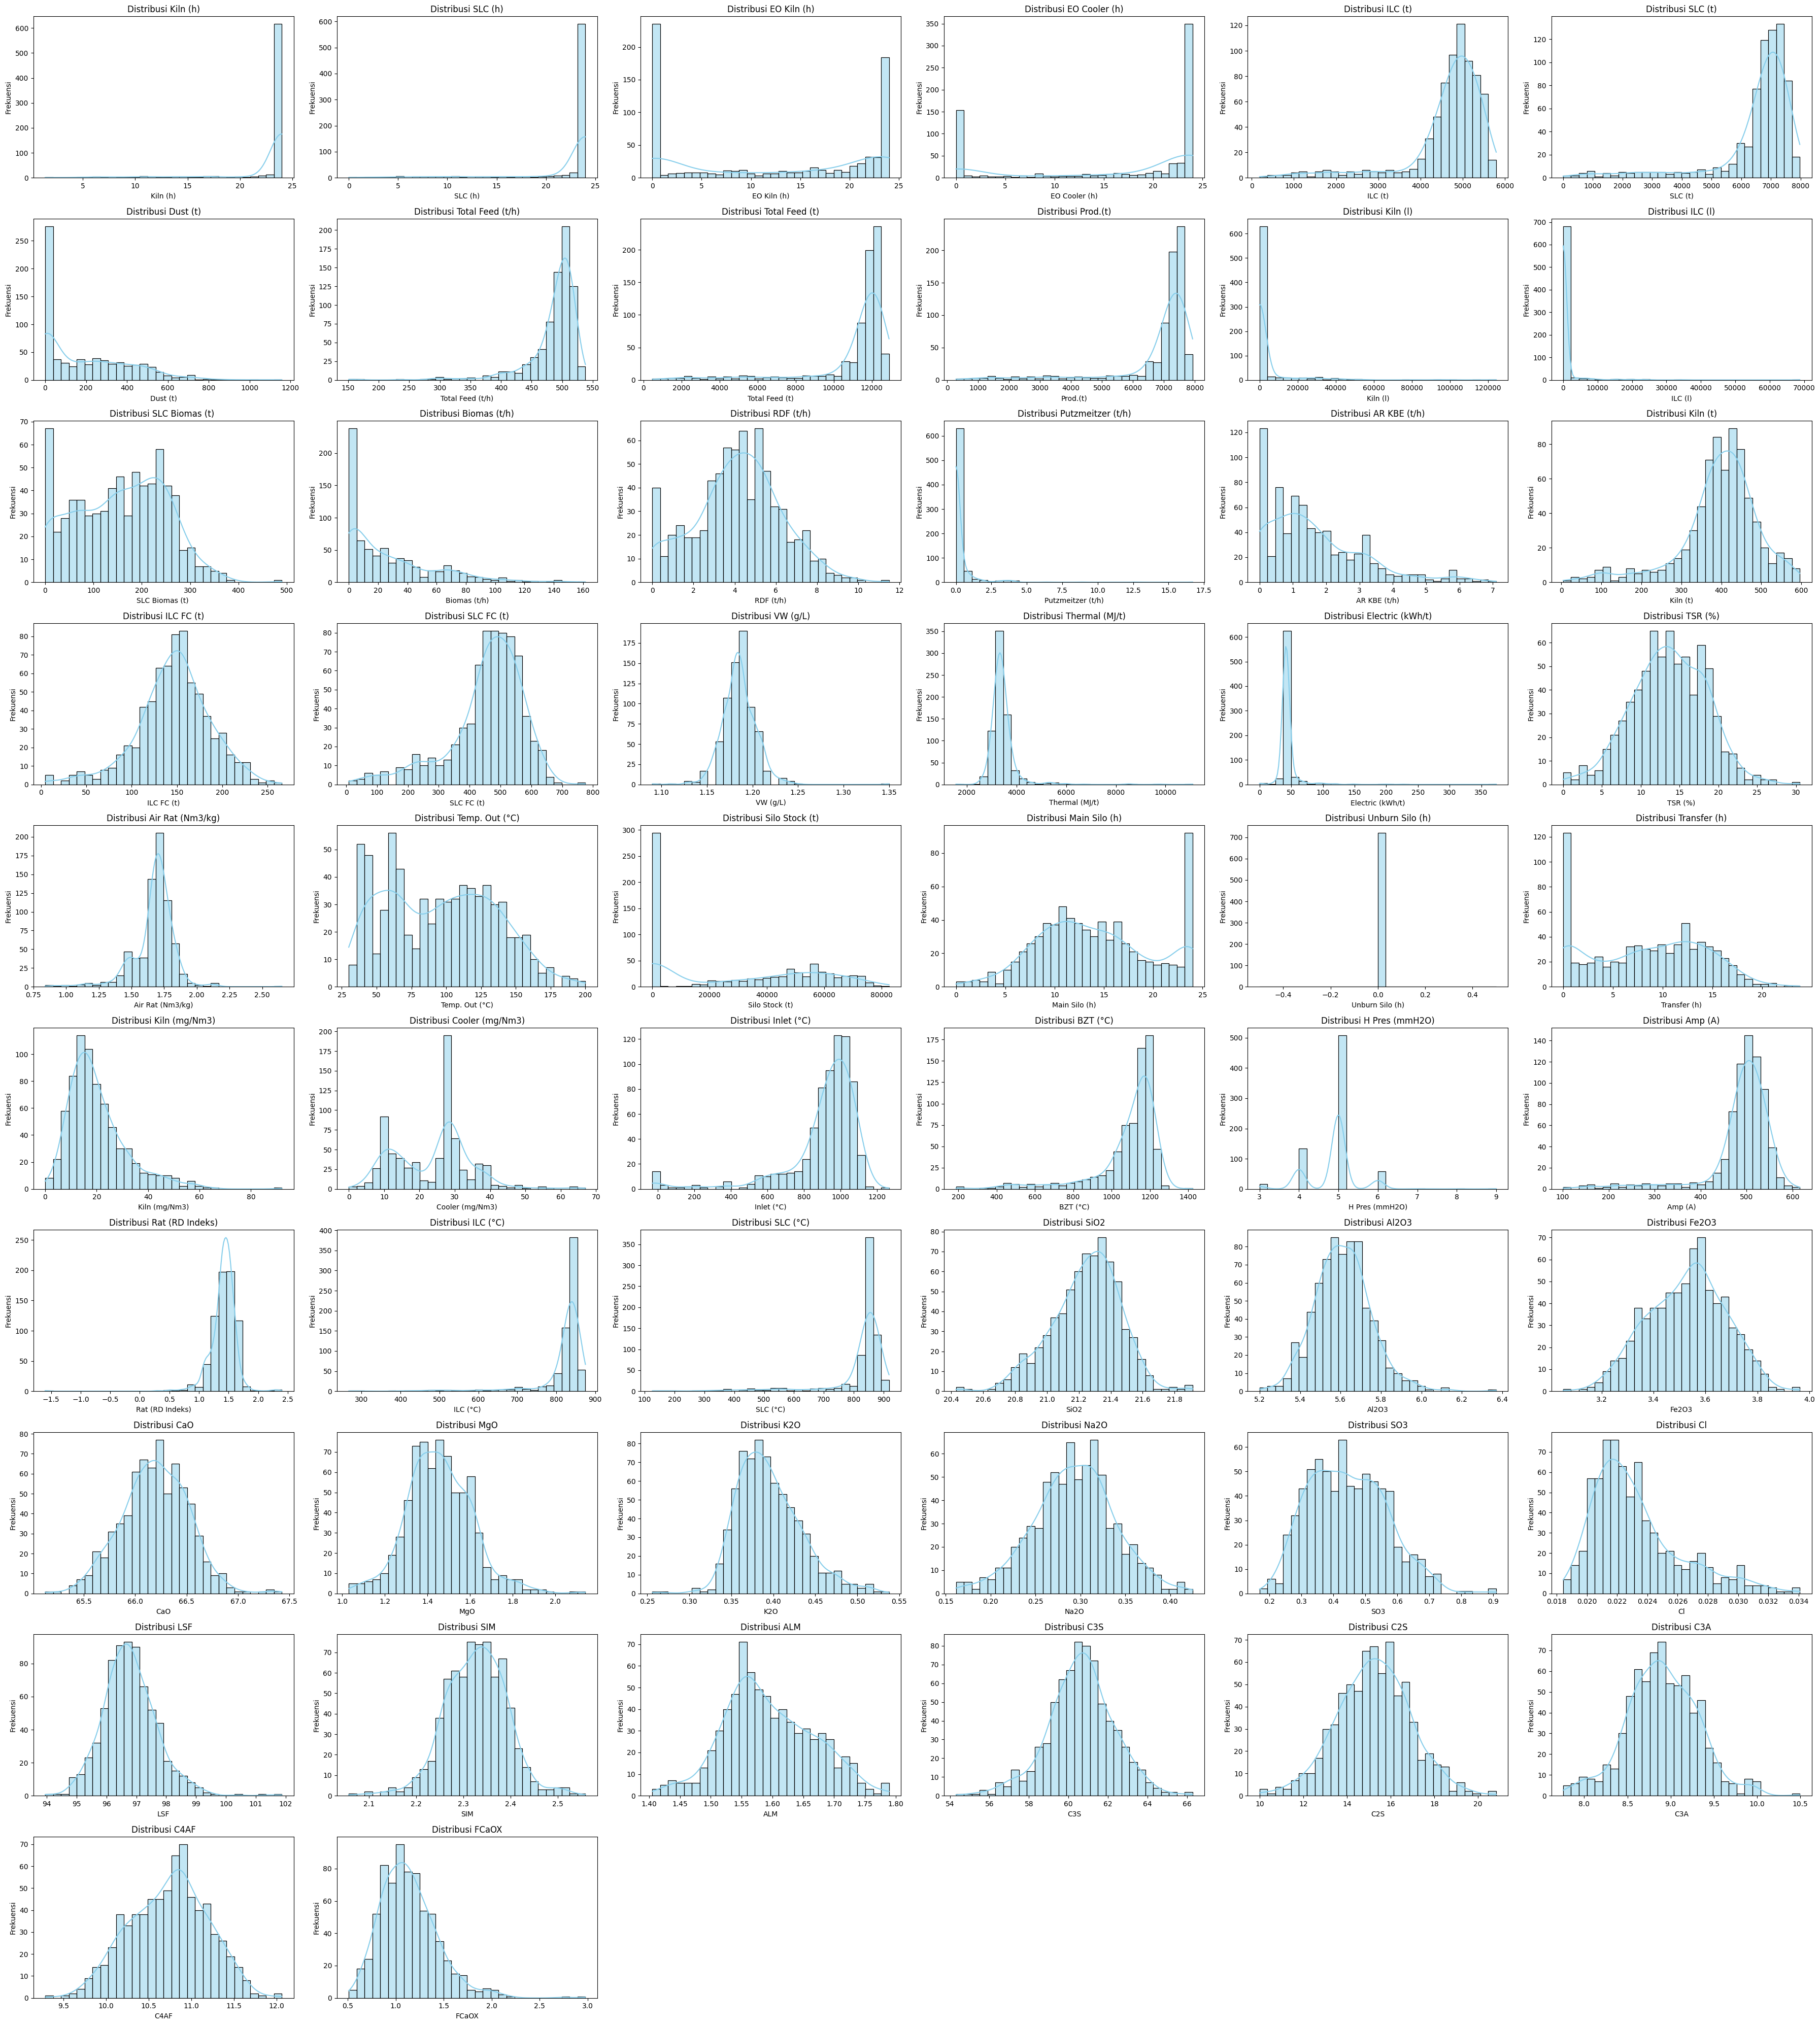

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# === 1. Ambil semua kolom numerik ===
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# === 2. Hitung jumlah subplot ===
n = len(numeric_cols)
cols = 6   # banyak kolom subplot
rows = math.ceil(n / cols)

# === 3. Buat canvas ===
plt.figure(figsize=(6*cols, 4*rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


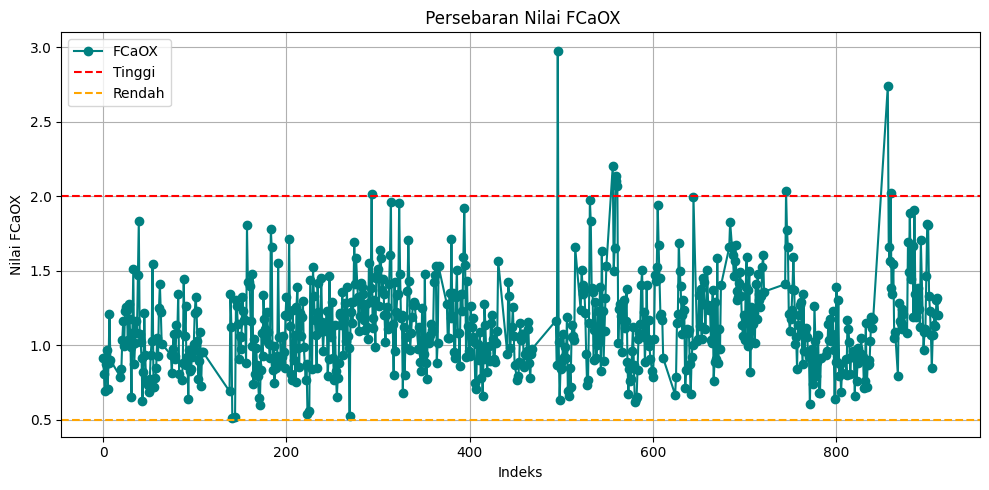

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['FCaOX'], marker='o', linestyle='-', color='teal', label='FCaOX')
plt.axhline(y=2, color='red', linestyle='--', label='Tinggi')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Rendah')

plt.title(' Persebaran Nilai FCaOX')
plt.xlabel('Indeks')
plt.ylabel('Nilai FCaOX')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## SVR

### REGULARISASI LASSO (SARAN)

In [ ]:
# PAKE ELASTIC NET + SVR

import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

# 1. Dataset contoh (ganti df dengan dataset kamu)
X = df.drop(columns=['FCaOX', 'Date'])  # fitur
y = df['FCaOX']  # target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Pipeline: scaling → ElasticNetCV (seleksi fitur) → SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(
        ElasticNetCV(cv=5, random_state=42)
    )),
    ('svr', SVR(kernel='linear'))
])

# 4. Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'feature_selection__estimator__l1_ratio': [0.1, 0.5, 0.9],  # variasi L1/L2
    'svr__C': [0.1, 1, 10],                                     # regularisasi SVR
    'svr__epsilon': [0.01, 0.1, 1]                              # margin SVR
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# 5. Fit model
grid.fit(X_train, y_train)

# 6. Prediksi terbaik
y_pred = grid.predict(X_test)

# 7. Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best Params:", grid.best_params_)
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

# 8. Fitur terpilih oleh Elastic Net terbaik
best_selector = grid.best_estimator_.named_steps['feature_selection']
selected_mask = best_selector.get_support()
selected_features = X.columns[selected_mask]

print("Fitur yang terpilih:", list(selected_features))
print("Jumlah fitur terpilih:", len(selected_features))


Best Params: {'feature_selection__estimator__l1_ratio': 0.1, 'svr__C': 1, 'svr__epsilon': 0.01}
Test MSE: 0.0001
Test R²: 0.9987
Fitur yang terpilih: ['SiO2', 'Al2O3', 'CaO', 'LSF', 'C3S', 'C3A']
Jumlah fitur terpilih: 6


c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.509e-03, tolerance: 5.306e-03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# PAKE LASSO + SVR

import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# ============================
# 1. Dataset
# ============================
X = df.drop(columns=['FCaOX', 'Date'])  # fitur
y = df['FCaOX']  # target

# Split data train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 2. Loop jumlah fitur
# ============================
for k in [5, 10, 15]:
    print("="*40)
    print(f"🔹 Uji dengan maksimal {k} fitur")

    # Pipeline: scaling → Lasso (max k fitur) → SVR
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(
            LassoCV(cv=5, random_state=42),
            max_features=k,
            threshold=-np.inf
        )),
        ('svr', SVR(kernel='linear', C=0.1, epsilon=0.01))
    ])

    # Training
    pipeline.fit(X_train, y_train)

    # Prediksi
    y_pred = pipeline.predict(X_test)

    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Fitur terpilih
    selector = pipeline.named_steps['feature_selection']
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask]

    # Output
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"Jumlah fitur awal: {X.shape[1]}")
    print(f"Jumlah fitur terpilih: {len(selected_features)}")
    print(f"Fitur yang dipakai: {list(selected_features)}")


🔹 Uji dengan maksimal 5 fitur


c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053537521423620005, tolerance: 0.004276077395703606
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005039951903617834, tolerance: 0.004276077395703606
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004384482168231479, tolerance: 0.0042168774123229925
  model 

Test MSE: 0.0001
Test R²: 0.9984
Jumlah fitur awal: 55
Jumlah fitur terpilih: 5
Fitur yang dipakai: ['SiO2', 'Al2O3', 'CaO', 'LSF', 'C3S']
🔹 Uji dengan maksimal 10 fitur


c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004384482168231479, tolerance: 0.0042168774123229925
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005021628415465773, tolerance: 0.004261734287398482
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00527343884652276, tolerance: 0.004261734287398482
  model = 

Test MSE: 0.0001
Test R²: 0.9986
Jumlah fitur awal: 55
Jumlah fitur terpilih: 10
Fitur yang dipakai: ['Kiln (h)', 'VW (g/L)', 'SLC (°C)', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'LSF', 'SIM', 'C3S']
🔹 Uji dengan maksimal 15 fitur


c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053537521423620005, tolerance: 0.004276077395703606
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005039951903617834, tolerance: 0.004276077395703606
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004384482168231479, tolerance: 0.0042168774123229925
  model 

Test MSE: 0.0001
Test R²: 0.9986
Jumlah fitur awal: 55
Jumlah fitur terpilih: 15
Fitur yang dipakai: ['Kiln (h)', 'Dust (t)', 'Biomas (t/h)', 'AR KBE (t/h)', 'VW (g/L)', 'Electric (kWh/t)', 'Silo Stock (t)', 'SLC (°C)', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'LSF', 'SIM', 'C3S']


### PEMILIHAN FITUR

In [68]:
X = df.drop(columns=['Date', 'FCaOX'])  
y_reg = df['FCaOX']             

c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Hasil Evaluasi SVR dengan Seleksi Fitur per Kernel:

Kernel: linear  | R²: 0.9728 | Fitur: ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']
Kernel: rbf     | R²: 0.4285 | Fitur: ['Al2O3', 'Fe2O3', 'CaO', 'LSF', 'C4AF']
Kernel: poly    | R²: 0.1149 | Fitur: ['ILC (t)', 'SLC (t)', 'Total Feed (t/h)', 'SLC Biomas (t) ', 'SLC FC (t)', 'VW (g/L)', 'Thermal (MJ/t)', 'Electric (kWh/t)', 'Air Rat (Nm3/kg)', 'Main Silo (h)', 'Transfer (h)', 'Inlet (°C)', 'BZT (°C)', 'ILC (°C)', 'SLC (°C)', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'Na2O', 'SO3', 'Cl', 'LSF', 'SIM', 'ALM', 'C3S', 'C2S', 'C4AF']


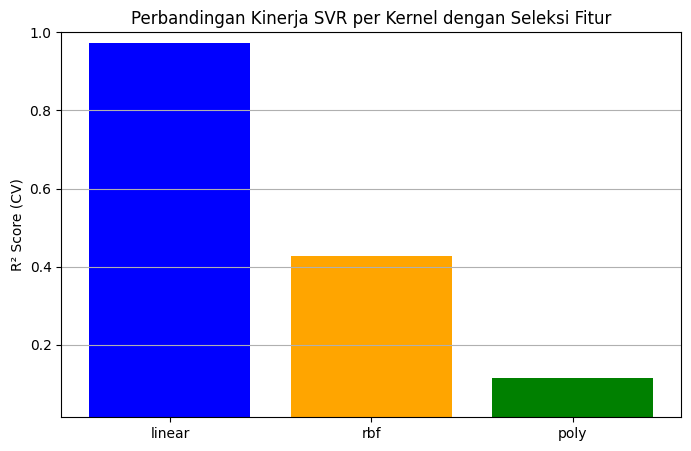

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# ------------------------------
# 1. Split data
# ------------------------------
X = df.drop(columns=['Date', 'FCaOX'])
y = df['FCaOX']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# ------------------------------
# 2. Pipeline per kernel
# ------------------------------
results = {}

# --- a) Linear kernel + RFE ---
svr_linear = SVR(kernel='linear')
rfe = RFE(estimator=svr_linear, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
X_train_sel = X_train_scaled.loc[:, rfe.support_]

r2_linear = cross_val_score(svr_linear, X_train_sel, y_train, cv=5, scoring='r2').mean()
results['linear'] = {"features": list(X_train_sel.columns), "R2": r2_linear}

# --- b) RBF kernel + ANOVA F-test ---
selector = SelectKBest(score_func=f_regression, k=5)
X_train_sel = selector.fit_transform(X_train_scaled, y_train)
selected_features = X.columns[selector.get_support()]
svr_rbf = SVR(kernel='rbf')
r2_rbf = cross_val_score(svr_rbf, X_train_sel, y_train, cv=5, scoring='r2').mean()
results['rbf'] = {"features": list(selected_features), "R2": r2_rbf}

# --- c) Poly kernel + RandomForest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
selector = SelectFromModel(rf, prefit=True, threshold="median")
X_train_sel = selector.transform(X_train_scaled)
selected_features = X.columns[selector.get_support()]
svr_poly = SVR(kernel='poly')
r2_poly = cross_val_score(svr_poly, X_train_sel, y_train, cv=5, scoring='r2').mean()
results['poly'] = {"features": list(selected_features), "R2": r2_poly}

# ------------------------------
# 3. Print hasil
# ------------------------------
print("Hasil Evaluasi SVR dengan Seleksi Fitur per Kernel:\n")
for k, v in results.items():
    print(f"Kernel: {k:7s} | R²: {v['R2']:.4f} | Fitur: {v['features']}")

# ------------------------------
# 4. Visualisasi
# ------------------------------
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [v["R2"] for v in results.values()], color=['blue', 'orange', 'green', 'red'])
plt.ylabel("R² Score (CV)")
plt.title("Perbandingan Kinerja SVR per Kernel dengan Seleksi Fitur")
plt.ylim(min([v["R2"] for v in results.values()]) - 0.1, 1)
plt.grid(axis='y')
plt.show()


Jumlah Fitur: 5, R2 Score: 0.9728
Fitur Terpilih: ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']
Jumlah Fitur: 10, R2 Score: 0.9621
Fitur Terpilih: ['Kiln (h)', 'ILC (°C)', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'LSF', 'C3S', 'C2S', 'C3A']


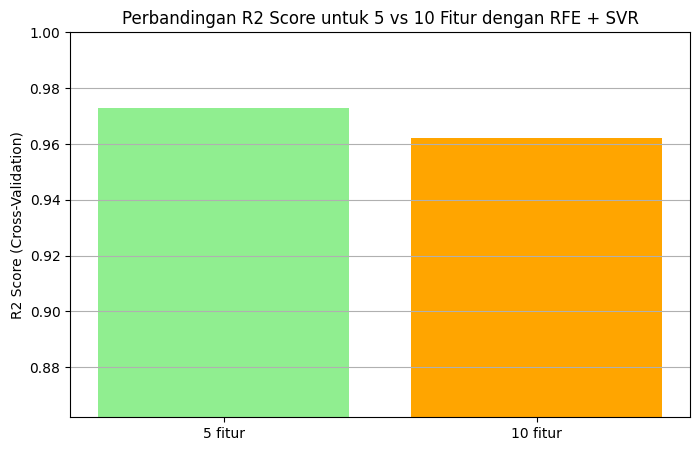

In [70]:
# Cek jumlah fitur
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# StandardScaler
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train_reg)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_reg.columns)

# -------------------------
# RFE + SVR
# -------------------------
svr = SVR(kernel='linear')
scores = []
feature_counts = [5, 10]  # membandingkan 5 dan 10 fitur

for n in feature_counts:
    rfe = RFE(estimator=svr, n_features_to_select=n)
    rfe.fit(X_train_scaled, y_train_reg)
    selected_features = X_train_scaled.columns[rfe.support_]
    X_selected = X_train_scaled[selected_features]

    # Cross-validation untuk regresi (pakai scoring 'r2' atau 'neg_mean_squared_error')
    score = cross_val_score(svr, X_selected, y_train_reg, cv=5, scoring='r2').mean()
    scores.append(score)

    print(f"Jumlah Fitur: {n}, R2 Score: {score:.4f}")
    print("Fitur Terpilih:", list(selected_features))
    print("=" * 40)

# -------------------------
# Visualisasi Hasil
# -------------------------
plt.figure(figsize=(8, 5))
plt.bar([str(f) + ' fitur' for f in feature_counts], scores, color=['lightgreen', 'orange'])
plt.ylabel('R2 Score (Cross-Validation)')
plt.title('Perbandingan R2 Score untuk 5 vs 10 Fitur dengan RFE + SVR')
plt.ylim(min(scores) - 0.1, 1)
plt.grid(axis='y')
plt.show()

In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Seleksi fitur dengan ANOVA F-test ---
k = 5   # jumlah fitur yang dipilih
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("Fitur terpilih:", list(selected_features))

# --- Latih model dengan kernel RBF ---
svr_rbf = SVR(kernel='rbf')
scores = cross_val_score(svr_rbf, X_train_selected, y_train, cv=5, scoring='r2')
print(f"R2 rata-rata (5-fold CV, RBF kernel, {k} fitur): {scores.mean():.4f}")


Fitur terpilih: ['Al2O3', 'Fe2O3', 'CaO', 'LSF', 'C4AF']
R2 rata-rata (5-fold CV, RBF kernel, 5 fitur): 0.4285


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# --- RandomForest sebagai feature selector ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

selector = SelectFromModel(rf, prefit=True, threshold="median")  # pilih fitur di atas median importance
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("Fitur terpilih:", list(selected_features))

# --- Latih model dengan kernel Polynomial ---
svr_poly = SVR(kernel='poly')
scores = cross_val_score(svr_poly, X_train_selected, y_train, cv=5, scoring='r2')
print(f"R2 rata-rata (5-fold CV, Poly kernel, {len(selected_features)} fitur): {scores.mean():.4f}")


Fitur terpilih: ['ILC (t)', 'SLC (t)', 'Total Feed (t/h)', 'SLC Biomas (t) ', 'SLC FC (t)', 'VW (g/L)', 'Thermal (MJ/t)', 'Electric (kWh/t)', 'Air Rat (Nm3/kg)', 'Main Silo (h)', 'Transfer (h)', 'Inlet (°C)', 'BZT (°C)', 'ILC (°C)', 'SLC (°C)', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'Na2O', 'SO3', 'Cl', 'LSF', 'SIM', 'ALM', 'C3S', 'C2S', 'C4AF']
R2 rata-rata (5-fold CV, Poly kernel, 28 fitur): 0.1149


### PEMILIHAN KERNEL

In [73]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# --- 1. Fitur dan target ---
fitur_kiln = ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']
X = df[fitur_kiln]
y = df['FCaOX'].values

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Scaling fitur (X) ---
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# --- 4. Bandingkan berbagai kernel ---
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = []

for k in kernels:
    svr = SVR(kernel=k, C=10, epsilon=0.1)
    scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    results.append((k, mean_mse))

# --- 5. Tampilkan hasil perbandingan ---
df_results = pd.DataFrame(results, columns=["Kernel", "Mean MSE"])
print(df_results.sort_values(by="Mean MSE"))

# --- 6. Pilih kernel terbaik ---
best_kernel = df_results.sort_values(by="Mean MSE").iloc[0, 0]
print(f"\nKernel terbaik: {best_kernel}")

# --- 7. Latih ulang dengan kernel terbaik ---
best_svr = SVR(kernel=best_kernel, C=10, epsilon=0.1)
best_svr.fit(X_train_scaled, y_train)

# --- 8. Evaluasi di data uji ---
y_pred = best_svr.predict(X_test_scaled)
print("\nEvaluasi di data uji:")
print("MSE :", mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))


    Kernel      Mean MSE
0   linear      0.002473
2      rbf      0.008400
1     poly      0.068459
3  sigmoid  30083.183088

Kernel terbaik: linear

Evaluasi di data uji:
MSE : 0.0012158944180398978
MAE : 0.02728442226265864
R²  : 0.9855891341452374


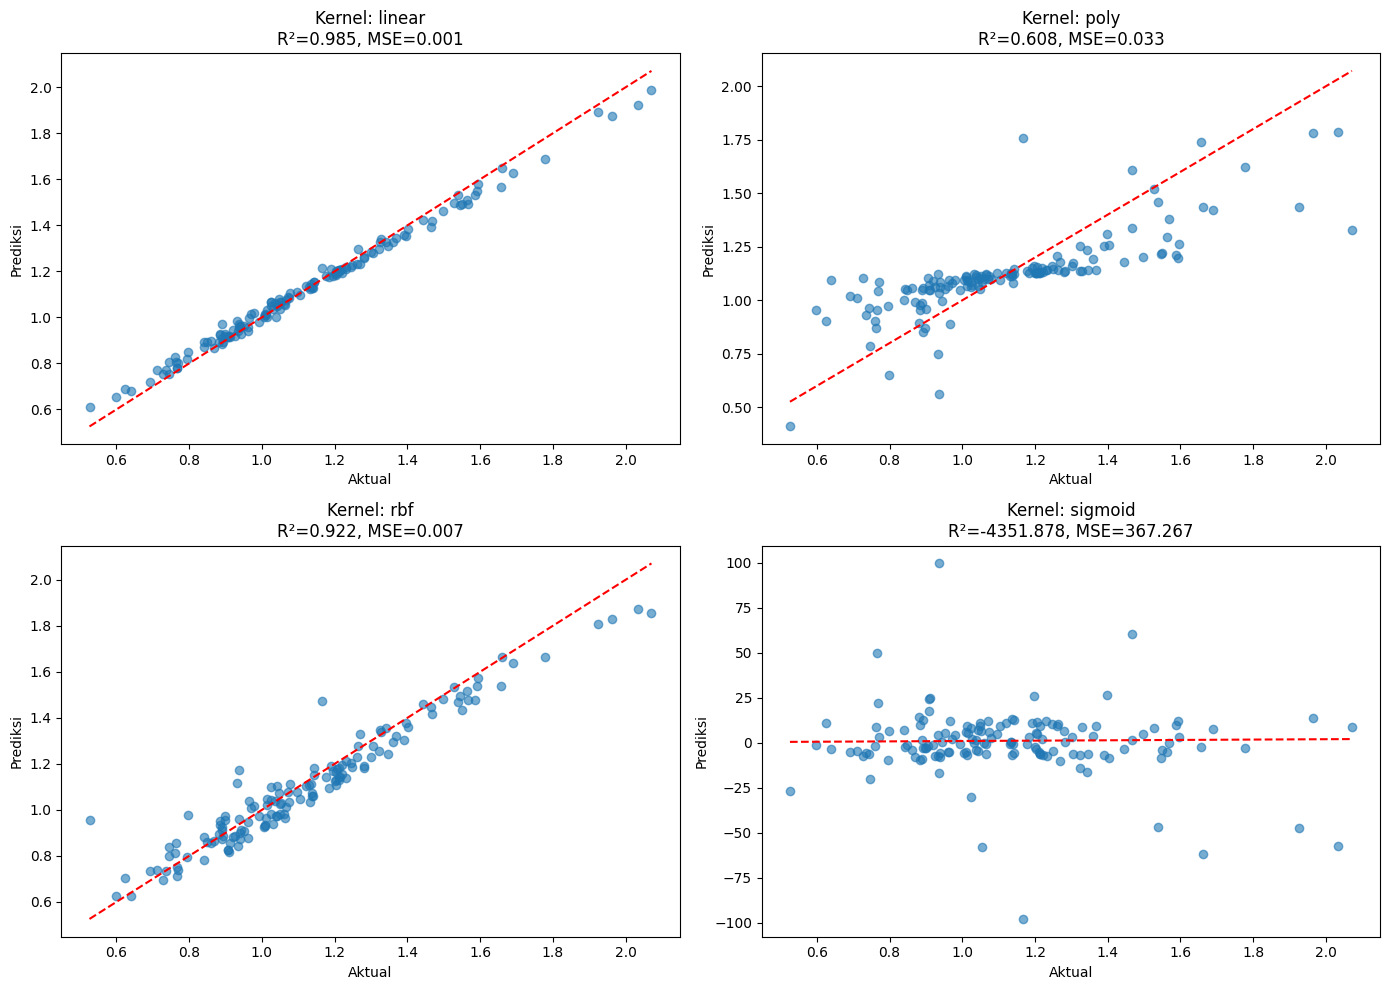

Hasil evaluasi setiap kernel (default parameter):
linear  -> R²: 0.9854, MSE: 0.0012
poly    -> R²: 0.6077, MSE: 0.0331
rbf     -> R²: 0.9217, MSE: 0.0066
sigmoid -> R²: -4351.8783, MSE: 367.2673


In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Daftar kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary untuk menyimpan hasil
results = {}

plt.figure(figsize=(14, 10))

for i, kernel in enumerate(kernels, 1):
    svr = SVR(kernel=kernel)  # pakai default C=1.0, epsilon=0.1, dst.
    svr.fit(X_train_scaled, y_train)
    
    # --- 5. Prediksi ---
    y_pred = svr.predict(X_test_scaled)
    
    # --- 6. Evaluasi ---
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[kernel] = {"MSE": mse, "R2": r2}
    
    # --- 7. Visualisasi ---
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Aktual")
    plt.ylabel("Prediksi")
    plt.title(f"Kernel: {kernel}\nR²={r2:.3f}, MSE={mse:.3f}")

plt.tight_layout()
plt.show()

# Print hasil numerik
print("Hasil evaluasi setiap kernel (default parameter):")
for k, v in results.items():
    print(f"{k:7s} -> R²: {v['R2']:.4f}, MSE: {v['MSE']:.4f}")


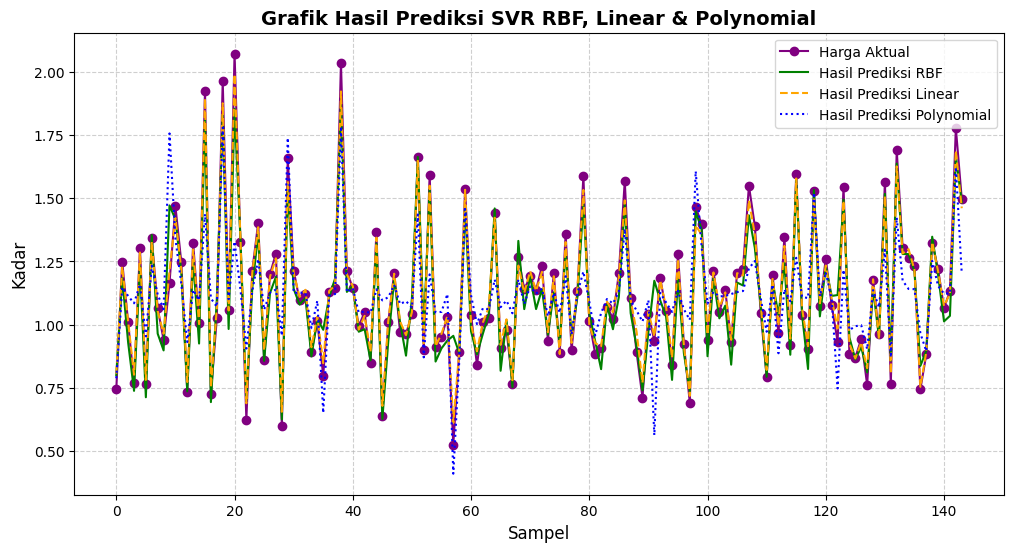

In [75]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# --- 1. Definisikan tiga kernel ---
models = {
    "RBF": SVR(kernel="rbf", C=1, epsilon=0.1, gamma="scale"),
    "Linear": SVR(kernel="linear", C=1, epsilon=0.1),
    "Polynomial": SVR(kernel="poly", degree=3, C=1, epsilon=0.1, coef0=0)
}

# --- 2. Latih dan prediksi ---
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)

# --- 3. Plot hasil ---
plt.figure(figsize=(12, 6))

# Data aktual
plt.plot(y_test, "o-", color="purple", label="Harga Aktual", markersize=6)

# Hasil prediksi tiap kernel
plt.plot(predictions["RBF"], "-", color="green", label="Hasil Prediksi RBF")
plt.plot(predictions["Linear"], "--", color="orange", label="Hasil Prediksi Linear")
plt.plot(predictions["Polynomial"], ":", color="blue", label="Hasil Prediksi Polynomial")

# --- 4. Tambahan gaya plot ---
plt.title("Grafik Hasil Prediksi SVR RBF, Linear & Polynomial", fontsize=14, weight="bold")
plt.xlabel("Sampel", fontsize=12)
plt.ylabel("Kadar", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


In [76]:
# Pemilihan kernel SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

# Split Data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Standard Scaling
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train_reg)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_reg.columns)

# -----------------------------
# STEP 1: Gunakan RFE dengan SVR Linear
# -----------------------------
rfe_svr = SVR(kernel='linear')
n_features = 5  # Atur jumlah fitur yang kamu inginkan
rfe = RFE(estimator=rfe_svr, n_features_to_select=n_features)
rfe.fit(X_train_scaled, y_train_reg)
selected_features = X_train_scaled.columns[rfe.support_]
print("Fitur terpilih (oleh SVR Linear + RFE):", list(selected_features))

# Siapkan data hasil seleksi
X_train_selected = X_train_scaled[selected_features]

# -----------------------------
# STEP 2: Uji Semua Kernel dengan fitur terpilih
# -----------------------------
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    svr = SVR(kernel=kernel)
    score = cross_val_score(svr, X_train_selected, y_train_reg, cv=5, scoring='r2').mean()
    results[kernel] = score
    print(f"Kernel: {kernel}, R2 Score: {score:.4f}")



Fitur terpilih (oleh SVR Linear + RFE): ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']
Kernel: linear, R2 Score: 0.9728
Kernel: rbf, R2 Score: 0.8967
Kernel: poly, R2 Score: 0.3352
Kernel: sigmoid, R2 Score: -3271.2827


### HYPERPARAMETER TUNING

In [77]:
# Cek CV = 10
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel=k))
    ])
    
    scores = cross_val_score(pipeline, X_train_reg, y_train_reg, cv=10, scoring='r2')
    print(f"Kernel: {k}, Mean R² Score: {scores.mean():.4f}")


Kernel: linear, Mean R² Score: 0.9786
Kernel: rbf, Mean R² Score: 0.9004
Kernel: poly, Mean R² Score: 0.3788
Kernel: sigmoid, Mean R² Score: -4139.4872


In [78]:
# Cek CV = 5
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel=k))
    ])
    
    scores = cross_val_score(pipeline, X_train_reg, y_train_reg, cv=5, scoring='r2')
    print(f"Kernel: {k}, Mean R² Score: {scores.mean():.4f}")


Kernel: linear, Mean R² Score: 0.9726
Kernel: rbf, Mean R² Score: 0.8968
Kernel: poly, Mean R² Score: 0.3348
Kernel: sigmoid, Mean R² Score: -3296.2010


In [79]:
# Cek CV = 3
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel=k))
    ])
    
    scores = cross_val_score(pipeline, X_train_reg, y_train_reg, cv=3, scoring='r2')
    print(f"Kernel: {k}, Mean R² Score: {scores.mean():.4f}")


Kernel: linear, Mean R² Score: 0.9774
Kernel: rbf, Mean R² Score: 0.8433
Kernel: poly, Mean R² Score: -1.4579
Kernel: sigmoid, Mean R² Score: -2204.8665


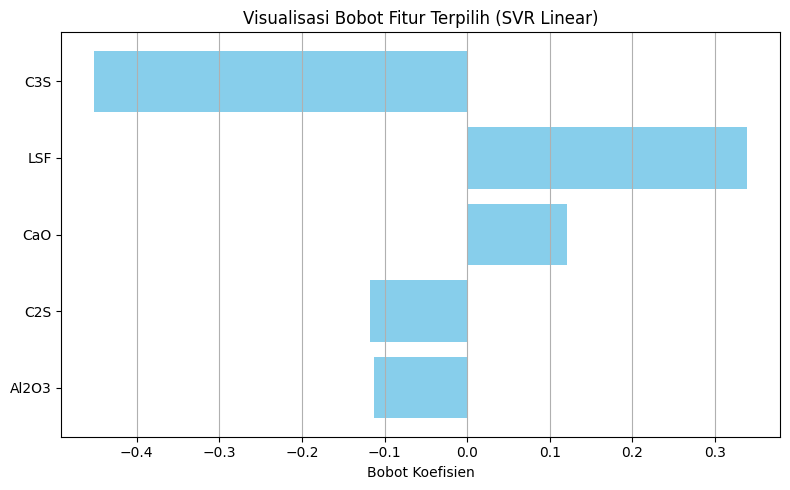

In [80]:
# Visualisasi bobot fitur terpilih dengan SVR Linear
final_model = SVR(kernel='linear')
final_model.fit(X_train_selected, y_train_reg)

# Ambil bobot/koefisien fitur
feature_weights = final_model.coef_.ravel()  # hasil array datar
feature_names = list(X_train_selected.columns)

# Buat DataFrame untuk visualisasi
df_weights = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_weights
}).sort_values(by='Weight', key=abs, ascending=False)  # urutkan berdasarkan nilai absolut bobot

# Visualisasi dengan bar plot
plt.figure(figsize=(8, 5))
plt.barh(df_weights['Feature'], df_weights['Weight'], color='skyblue')
plt.xlabel("Bobot Koefisien")
plt.title("Visualisasi Bobot Fitur Terpilih (SVR Linear)")
plt.gca().invert_yaxis()  # fitur dengan bobot terbesar di atas
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 18 candidates, totalling 90 fits
🔎 Best Parameters: {'C': 0.1, 'epsilon': 0.01}
⭐ Best CV Score (R²): 0.9890558308197412

📊 Evaluasi pada Test Set:
R² = 0.9974
MSE = 0.0002


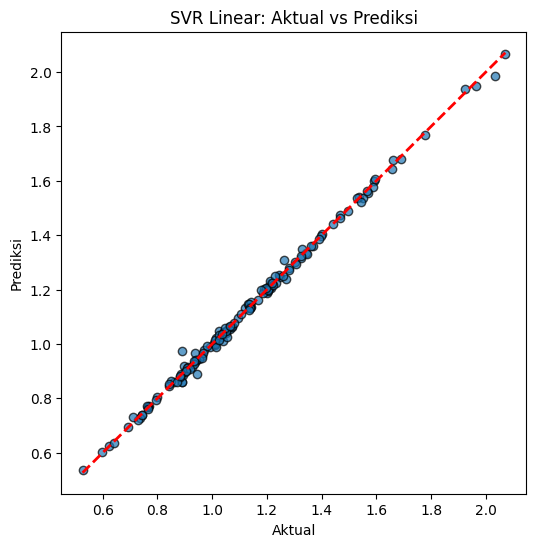

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# --- 1. Pilih fitur & target ---
fitur_kiln = ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']
X = df[fitur_kiln]
y = df['FCaOX'].values

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Scaling fitur ---
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# --- 4. Definisikan parameter grid untuk kernel linear ---
param_grid = {
    'C': [0.1, 1, 10, 50, 100, 200],
    'epsilon': [0.1, 0.05, 0.01]
}

# --- 5. GridSearch untuk SVR Linear ---
svr_linear = SVR(kernel='linear')
grid_search = GridSearchCV(
    svr_linear,
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

# --- 6. Model terbaik ---
best_model = grid_search.best_estimator_
print("🔎 Best Parameters:", grid_search.best_params_)
print("⭐ Best CV Score (R²):", grid_search.best_score_)

# --- 7. Evaluasi di test set ---
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n📊 Evaluasi pada Test Set:")
print(f"R² = {r2:.4f}")
print(f"MSE = {mse:.4f}")

# --- 8. Visualisasi scatter plot (aktual vs prediksi) ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # garis ideal
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("SVR Linear: Aktual vs Prediksi")
plt.show()


In [83]:
fitur_kiln = ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']

In [84]:
X = df[fitur_kiln]
y = df['FCaOX']  # Target asli (kontinu)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler_svr = StandardScaler()
X_scaled_svr = scaler_svr.fit_transform(X_train)
X_test_scaled = scaler_svr.transform(X_test)

In [87]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=0.1,epsilon=0.01)
svr_model.fit(X_scaled_svr, y_train)

SVR(C=0.1, epsilon=0.01, kernel='linear')

In [ ]:
# import joblib
# joblib.dump(svr_model, 'final_model_svr1.pkl')
# joblib.dump(scaler_svr, 'final_scaler1.pkl')


['final_scaler1.pkl']

In [88]:
y_pred = svr_model.predict(X_test_scaled)


In [89]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Hitung MSE & R² ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- Hitung RMSE ---
rmse = np.sqrt(mse)

# --- Hitung MAPE ---
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# --- Print hasil ---
print(f"[SVR] Mean Squared Error (MSE): {mse:.4f}")
print(f"[SVR] Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"[SVR] R² Score: {r2:.4f}")
print(f"[SVR] MAPE: {mape:.2f}%")


[SVR] Mean Squared Error (MSE): 0.0002
[SVR] Root Mean Squared Error (RMSE): 0.0147
[SVR] R² Score: 0.9974
[SVR] MAPE: 0.90%


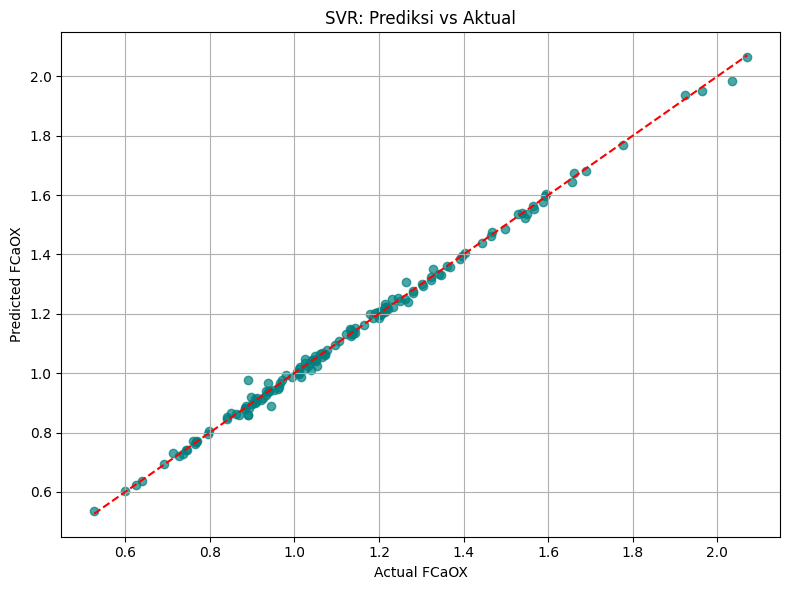

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual FCaOX')
plt.ylabel('Predicted FCaOX')
plt.title('SVR: Prediksi vs Aktual')
plt.grid(True)
plt.tight_layout()
plt.show()

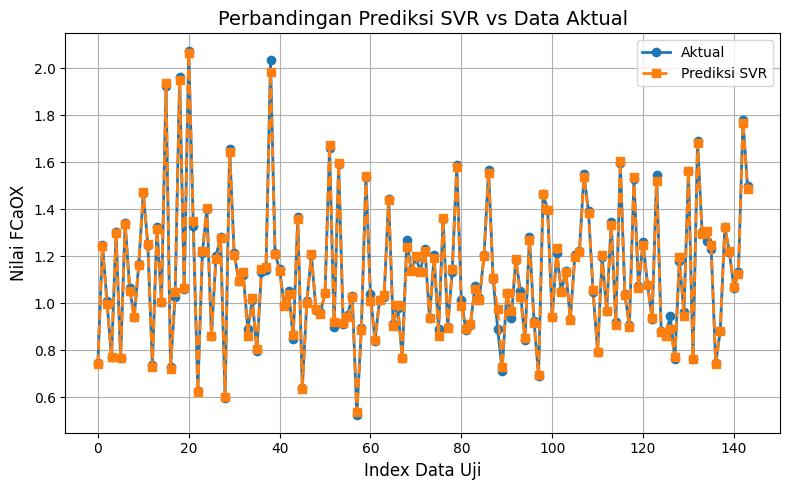

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan y_test dan y_pred sudah tersedia dari proses sebelumnya

# Jika y_test adalah Series pandas, ubah jadi array NumPy
y_test_array = y_test.to_numpy()

# Plot garis Prediksi vs Aktual
plt.figure(figsize=(8, 5))
plt.plot(y_test_array, label='Aktual', marker='o', linewidth=2)
plt.plot(y_pred, label='Prediksi SVR', marker='s', linestyle='--', linewidth=2)

# Tambahan styling
plt.title('Perbandingan Prediksi SVR vs Data Aktual', fontsize=14)
plt.xlabel('Index Data Uji', fontsize=12)
plt.ylabel('Nilai FCaOX', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()


In [92]:
# Buat dataframe aktual vs prediksi
df_pred = pd.DataFrame({
    'Aktual FCaOX': y_test,
    'Prediksi FCaOX': y_pred
})
df_pred['Selisih'] = df_pred['Aktual FCaOX'] - df_pred['Prediksi FCaOX']
print(df_pred.head())

     Aktual FCaOX  Prediksi FCaOX   Selisih
406      0.744980        0.739381  0.005599
348      1.248714        1.244546  0.004169
64       1.009991        0.995806  0.014185
252      0.769675        0.772409 -0.002734
568      1.301420        1.299836  0.001584


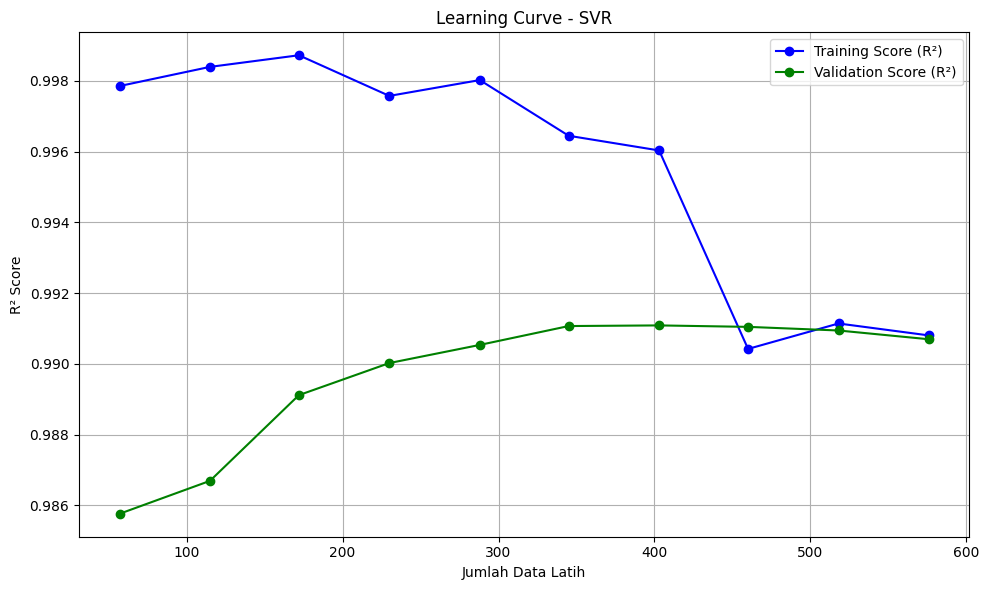

In [93]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat pipeline: scaling + SVR
pipeline = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear', C=0.1, epsilon=0.01)
)

# 2. Hitung learning curve
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X, y,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# 3. Visualisasi
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score (R²)', color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score (R²)', color='green')
plt.title('Learning Curve - SVR')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Inisialisasi parameter grid
param_grid = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.1, 0.2]
}

# Simpan hasil evaluasi
cv_results = []

for cv_val in [3, 5, 10]:
    print(f"\n🔍 Running GridSearchCV with cv = {cv_val}")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv_val, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("Best Parameters:", grid_search.best_params_)
    print("R² Score (Test Set):", r2)
    print("RMSE (Test Set):", rmse)

    # Simpan hasil untuk dibandingkan
    cv_results.append({
        'CV': cv_val,
        'Best Params': grid_search.best_params_,
        'R2 Score': r2,
        'RMSE': rmse
    })

# Konversi hasil ke DataFrame
df_cv_comparison = pd.DataFrame(cv_results)
print("\n📊 Perbandingan CV:")
print(df_cv_comparison)



🔍 Running GridSearchCV with cv = 3
Best Parameters: {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
R² Score (Test Set): 0.9853702992286749
RMSE (Test Set): 0.03513343527392337

🔍 Running GridSearchCV with cv = 5
Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
R² Score (Test Set): 0.9812823359646287
RMSE (Test Set): 0.03974007830347654

🔍 Running GridSearchCV with cv = 10
Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
R² Score (Test Set): 0.9855891341452374
RMSE (Test Set): 0.03486967763028356

📊 Perbandingan CV:
   CV                                        Best Params  R2 Score      RMSE
0   3  {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma...  0.985370  0.035133
1   5  {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__gam...  0.981282  0.039740
2  10  {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamm...  0.985589  0.034870


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# === 1. Buat pipeline ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# === 2. Definisikan parameter grid ===
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5, 1],
    'svr__gamma': ['scale', 'auto']
}

# === 3. GridSearchCV untuk cari kernel terbaik ===
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("🔥 Kernel & Params terbaik dari GridSearchCV:")
print(grid_search.best_params_)
print("R² (mean CV=5):", grid_search.best_score_)

# === 4. Evaluasi di test set ===
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📊 Evaluasi di Test Set:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# === 5. Uji konsistensi dengan CV berbeda ===
cv_results = []
for cv_val in [3, 5, 10]:
    scores = cross_val_score(best_model, X_train, y_train, cv=cv_val, scoring='r2')
    cv_results.append({'CV': cv_val, 'Mean R²': scores.mean()})

df_cv_comparison = pd.DataFrame(cv_results)
print("\n📈 Perbandingan R² dengan berbagai CV:")
print(df_cv_comparison)


🔥 Kernel & Params terbaik dari GridSearchCV:
{'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
R² (mean CV=5): 0.9890653197720279

📊 Evaluasi di Test Set:
R² Score: 0.9974
RMSE: 0.0147

📈 Perbandingan R² dengan berbagai CV:
   CV   Mean R²
0   3  0.989479
1   5  0.989065
2  10  0.990205


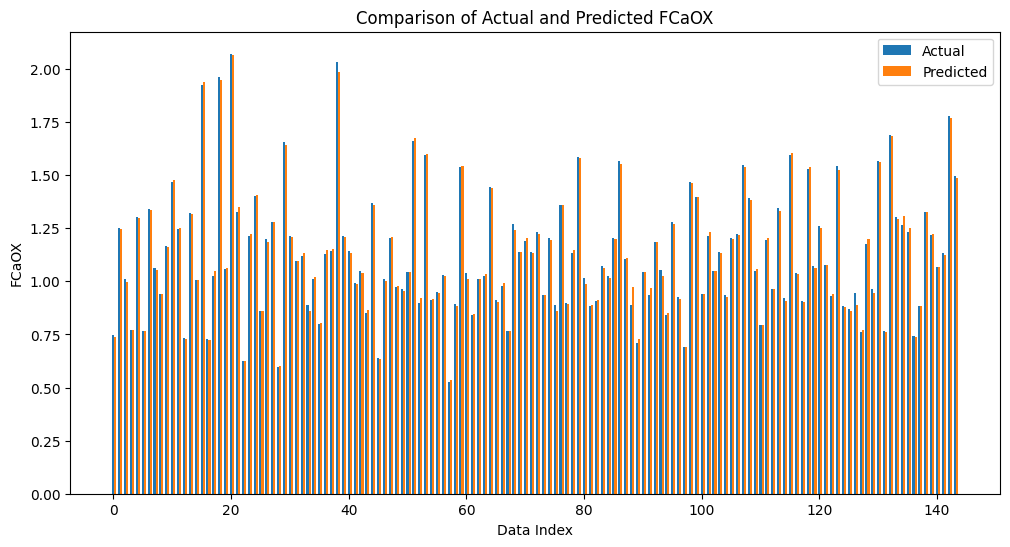

In [96]:
import numpy as np

plt.figure(figsize=(12, 6))
index = np.arange(len(y_test_reg))
width = 0.35

plt.bar(index, y_test, width=width, label='Actual')
plt.bar(index + width, y_pred, width=width, label='Predicted')
plt.xlabel('Data Index')
plt.ylabel('FCaOX')
plt.title('Comparison of Actual and Predicted FCaOX')
plt.legend()
plt.show()


In [97]:
svr_model.support_vectors_


array([[ 0.57179424, -1.87059228,  0.28152306,  0.60616982, -1.13450357],
       [-0.13090673,  1.05876015, -0.02525982,  0.02895959,  0.48956564],
       [-1.34512939, -0.72871539, -0.57485439, -0.26904272,  0.72271355],
       ...,
       [-0.70859385, -1.01687379, -0.6237038 , -0.10439433,  0.07405707],
       [-0.18476709,  0.08519347,  0.18203579, -1.31684792,  0.93358556],
       [ 0.64603515,  0.06751641, -0.27430579, -0.50861765,  0.34741294]],
      shape=(204, 5))

In [98]:
svr_model.dual_coef_


array([[ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       , -0.1       ,  0.1       , -0.03745971,  0.1       ,
         0.1       ,  0.1       , -0.1       , -0.1       , -0.1       ,
        -0.1       , -0.1       ,  0.1       ,  0.1       , -0.1       ,
         0.01004906, -0.09164648, -0.02769841,  0.1       , -0.1       ,
        -0.1       ,  0.1       ,  0.1       ,  0.1       , -0.1       ,
        -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
         0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        -0.1       , -0.1       , -0.1       ,  0.1       , -0.1       ,
        -0.1       , -0.1       , -0.1       , -0.1       ,  0.1       ,
         0.1       , -0.1       ,  0.1       , -0.1       , -0.1       ,
         0.00750445, -0.01691215,  0.1       ,  0.1       , -0.1       ,
         0.1       ,  0.1       ,  0.1       , -0.1

In [99]:
print("Slope (w):", svr_model.coef_)
print("Intercept (b):", svr_model.intercept_)


Slope (w): [[-0.12894504  0.11396748  0.3926974  -0.46096973 -0.07109173]]
Intercept (b): [1.14088625]


In [100]:
import numpy as np

# Asumsikan scaler_svr sudah fit ke X
X_mean = scaler_svr.mean_
X_std = scaler_svr.scale_

# Ambil koefisien dan intercept dari model SVR (dengan kernel='linear')
w_scaled = svr_model.coef_[0]    # array shape (n_features,)
b_scaled = svr_model.intercept_[0]

# Transformasikan ke bentuk asli (tanpa scaling)
w_original = w_scaled / X_std
b_original = b_scaled - np.sum((X_mean / X_std) * w_scaled)

# Nama fitur sesuai urutan input
fitur_kiln = ['Al2O3', 'CaO', 'LSF', 'C3S', 'C2S']
# Cetak persamaan regresinya
persamaan = "ŷ = "
for coef, feature in zip(w_original, fitur_kiln):
    persamaan += f"{coef:.4f} · {feature} + "

persamaan += f"{b_original:.4f}"

print("Persamaan SVR Linear (tanpa scaling):")
print(persamaan)


Persamaan SVR Linear (tanpa scaling):
ŷ = -0.8975 · Al2O3 + 0.3483 · CaO + 0.4306 · LSF + -0.2720 · C3S + -0.0419 · C2S + -41.4295


## FUZZY


🔢 Prediksi FCaOX: 0.3
🎯 Output fuzzy status: 14.44
🧠 Klasifikasi: FCaOX Terlalu Rendah

🔢 Prediksi FCaOX: 0.5
🎯 Output fuzzy status: 50.00
🧠 Klasifikasi: FCaOX Normal

🔢 Prediksi FCaOX: 1.25
🎯 Output fuzzy status: 50.00
🧠 Klasifikasi: FCaOX Normal

🔢 Prediksi FCaOX: 2.0
🎯 Output fuzzy status: 50.00
🧠 Klasifikasi: FCaOX Normal

🔢 Prediksi FCaOX: 2.3
🎯 Output fuzzy status: 86.67
🧠 Klasifikasi: FCaOX Terlalu Tinggi


c:\Users\ASUS VIVOBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


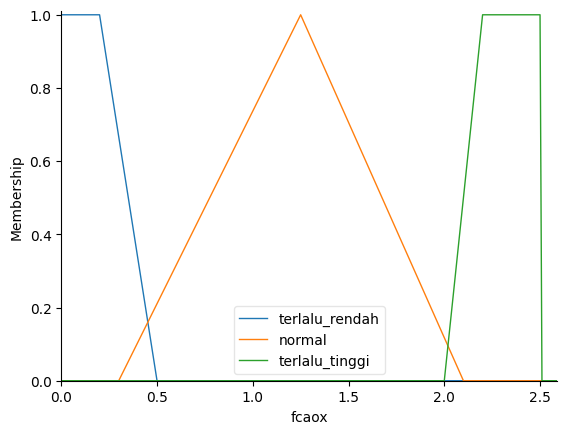

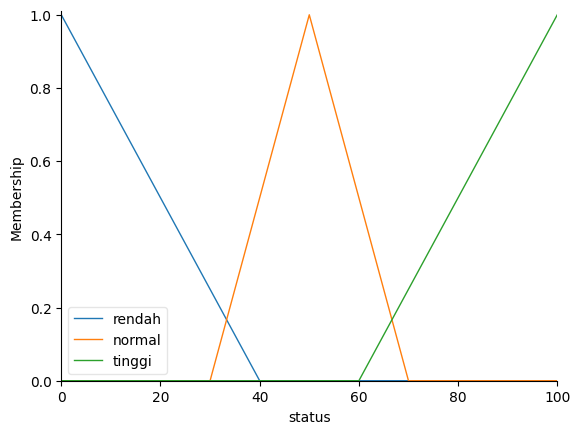

In [59]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definisikan variabel fuzzy
fcaox = ctrl.Antecedent(np.arange(0.0, 2.6, 0.01), 'fcaox')
status = ctrl.Consequent(np.arange(0, 101, 1), 'status')

# 2. Fungsi keanggotaan untuk FCaOX dengan overlap agar tidak error di batas
fcaox['terlalu_rendah'] = fuzz.trapmf(fcaox.universe, [0.0, 0.0, 0.2, 0.5])
fcaox['normal'] = fuzz.trimf(fcaox.universe, [0.3, 1.25, 2.1])
fcaox['terlalu_tinggi'] = fuzz.trapmf(fcaox.universe, [2.0, 2.2, 2.5, 2.5])


# 3. Fungsi keanggotaan untuk status kualitas
status['rendah'] = fuzz.trimf(status.universe, [0, 0, 40])
status['normal'] = fuzz.trimf(status.universe, [30, 50, 70])
status['tinggi'] = fuzz.trimf(status.universe, [60, 100, 100])

# 4. Aturan fuzzy
rule1 = ctrl.Rule(fcaox['terlalu_rendah'], status['rendah'])
rule2 = ctrl.Rule(fcaox['normal'], status['normal'])
rule3 = ctrl.Rule(fcaox['terlalu_tinggi'], status['tinggi'])

# 5. Bangun sistem fuzzy
status_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
status_sim = ctrl.ControlSystemSimulation(status_ctrl)

# 6. Coba beberapa nilai input
test_values = [0.3, 0.5, 1.25, 2.0, 2.3]
for nilai_prediksi_svr in test_values:
    status_sim.input['fcaox'] = nilai_prediksi_svr
    status_sim.compute()

    output_status = status_sim.output['status']
    print(f"\n🔢 Prediksi FCaOX: {nilai_prediksi_svr}")
    print(f"🎯 Output fuzzy status: {output_status:.2f}")

    if output_status <= 40:
        klasifikasi = 'FCaOX Terlalu Rendah'
    elif output_status <= 65:
        klasifikasi = 'FCaOX Normal'
    else:
        klasifikasi = 'FCaOX Terlalu Tinggi'

    print(f"🧠 Klasifikasi: {klasifikasi}")

# 7. Visualisasi (opsional)
fcaox.view()
status.view()
plt.show()


In [69]:
nilai_uji = 2.1
status_sim.input['fcaox'] = nilai_uji
status_sim.compute()

output_status = status_sim.output['status']
print(f"\n🔢 Prediksi FCaOX: {nilai_uji}")
print(f"🎯 Output fuzzy status: {output_status:.2f}")

if output_status <= 40:
    klasifikasi = 'FCaOX Terlalu Rendah'
elif output_status <= 70:
    klasifikasi = 'FCaOX Normal'
else:
    klasifikasi = 'FCaOX Terlalu Tinggi'

print(f"🧠 Klasifikasi: {klasifikasi}")



🔢 Prediksi FCaOX: 2.1
🎯 Output fuzzy status: 84.44
🧠 Klasifikasi: FCaOX Terlalu Tinggi
